In [2]:
import scipy.integrate as integrate 
import numpy as np
import matplotlib.pyplot as plt 
from math import e,pi
from scipy import interpolate 
import statistics
from scipy import signal
from scipy.stats import linregress 
import scipy.fftpack
import matplotlib.pyplot as plt 
import pandas as pd
import os

In [3]:
#for reference
#u band = 350nm
#g band = 470nm
#r band = 620nm
#i band = 750nm
#z band = 890nm

# Redshift/Rest-Frame Wavelength Work

In [4]:
#Getting redshifts from data to calibrate simulation

attributes = pd.read_excel('/Users/alanroden/Documents/SDSSQuasarAttributes.xlsx')

import glob
folder_path1 = '/Users/alanroden/Library/Mobile Documents/com~apple~CloudDocs/QSO_S82.Edit_Full3'
keys = range(9258)
dicts = {}
dicts_vals = []
dicts_keys = []
values = [filename for filename in glob.glob(os.path.join(folder_path1, '*.txt'))]
for i in keys:
    dicts[i] = values[i]
for i in dicts.values():
    dicts_vals.append(i)
for i in dicts.keys():
    dicts_keys.append(i)
    
texts = []
for i in dicts_vals:
    texts.append(i[81:])
    
texts1 = []
for i in texts:
    texts1.append(i[:-4])

names = []
reds = []
bhm = []
bolum = []
texts2 = []
texts3 = []
texts4 = []
for i in attributes['dbID']:
    j = str(i)
    names.append(j)
    
for i in attributes['redshift']:
    reds.append(i)
for i in attributes['mass_BH(log(M/M_sun))']:
    bhm.append(i)
for i in attributes['Lbol(log(ergs/s))']:
    bolum.append(i)
for i in zip(names, reds):
    texts2.append(i)
for i in zip(names, bhm):
    texts3.append(i)
for i in zip(names, bolum):
    texts4.append(i)
    
redshifts = []
for i in texts1:
    for j,k in texts2:
        if i == j:
            redshifts.append(k)

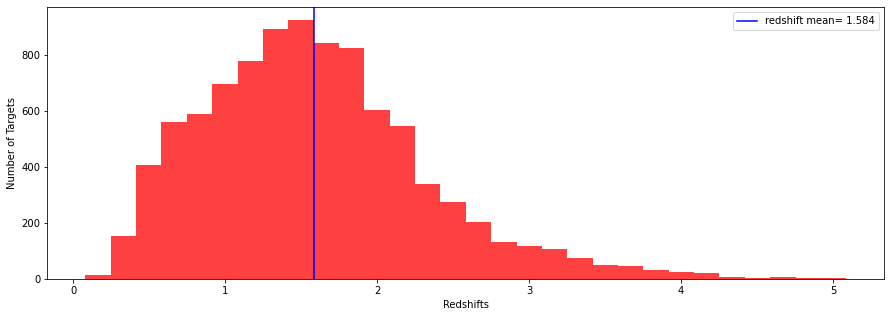

In [5]:
#Plot of all of the redshifts
plt.figure(figsize = (15,5))
plt.hist(redshifts, bins=30, color='r', alpha=0.75)
plt.axvline(np.mean(redshifts),color='b', linestyle='solid', linewidth=1.5, label = 'redshift mean= '+ str(round(np.mean(redshifts), 3)))
plt.xlabel("Redshifts")
plt.ylabel("Number of Targets")
plt.legend()

In [6]:
#Grouping the redshifts into FIVE groups 
red_group1 = []
red_group2 = []
red_group3 = []
red_group4 = []
red_group5 = []

for i in redshifts:
    if i <= 1:
        red_group1.append(i)
    elif 1 < i <= 2:
        red_group2.append(i)
    elif 2 < i <= 3:
        red_group3.append(i)
    elif 3 < i <= 4:
        red_group4.append(i)
    elif 4 < i <= 5.5:
        red_group5.append(i)
        
print(len(red_group1))
print(len(red_group2))
print(len(red_group3))
print(len(red_group4))
print(len(red_group5))

2007
4983
1835
380
53


In [7]:
#Gathering mean of redshift for each group
red_g1 = np.mean(red_group1)
print("Mean for Group 1: ")
print(red_g1)
print()
red_g2 = np.mean(red_group2)
print("Mean for Group 2: ")
print(red_g2)
print()
red_g3 = np.mean(red_group3)
print("Mean for Group 3: ")
print(red_g3)
print()
red_g4 = np.mean(red_group4)
print("Mean for Group 4: ")
print(red_g4)
print()
red_g5 = np.mean(red_group5)
print("Mean for Group 5: ")
print(red_g5)
print()

Mean for Group 1: 
0.6969301943198803

Mean for Group 2: 
1.492083684527393

Mean for Group 3: 
2.3530886103542237

Mean for Group 4: 
3.366538947368421

Mean for Group 5: 
4.351650943396226



In [8]:
redshift_mean_groups = []

redshift_mean_groups.append(red_g1)
redshift_mean_groups.append(red_g2)
redshift_mean_groups.append(red_g3)
redshift_mean_groups.append(red_g4)
redshift_mean_groups.append(red_g5)


In [9]:
print(redshift_mean_groups)

[0.6969301943198803, 1.492083684527393, 2.3530886103542237, 3.366538947368421, 4.351650943396226]



BEGINNING OF PLOTTING AND CALCULATIONS for REDSHIFT GROUP 1

PLOTTING




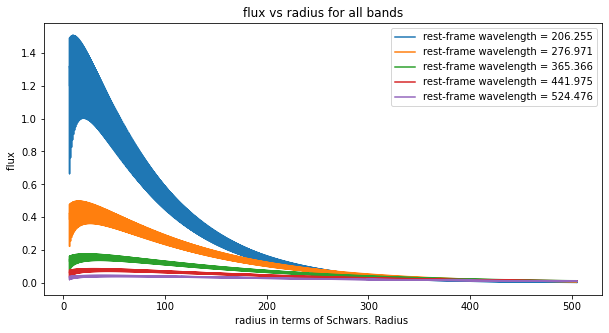

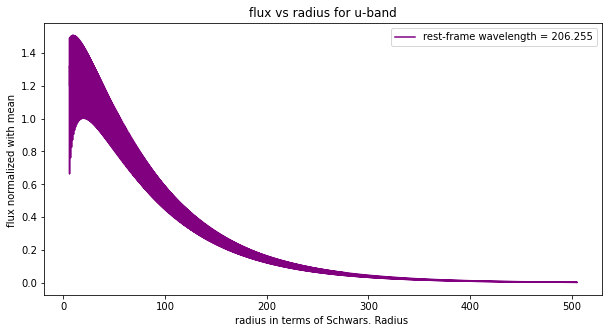

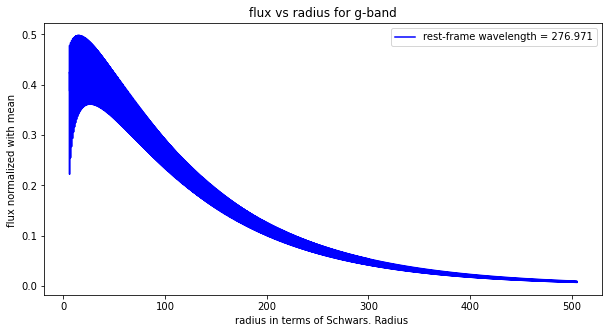

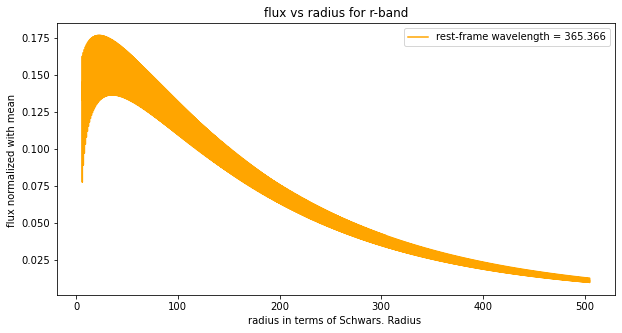

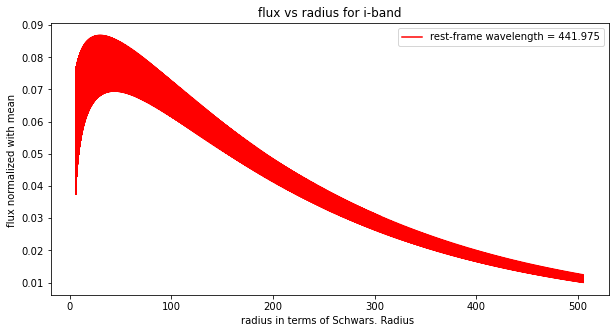

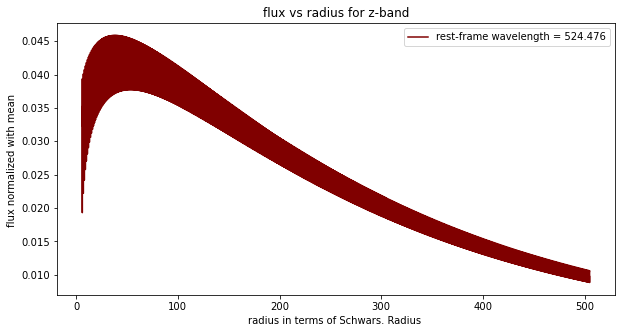


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs

Slope: -1.2615692235959441 Intercept: 1.505298877247196


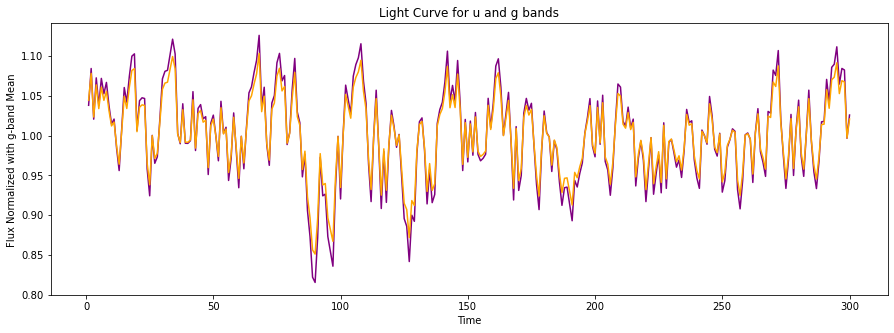

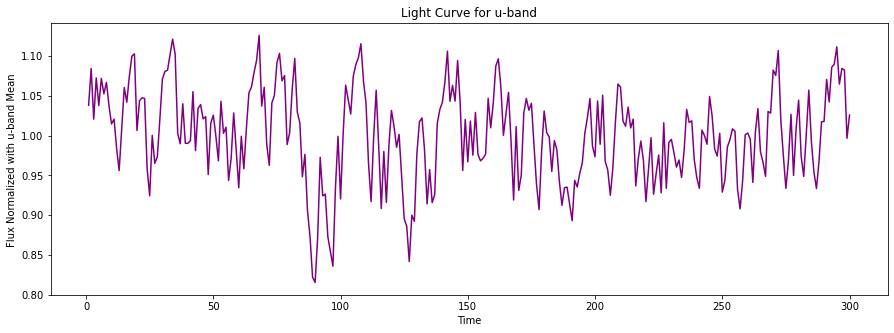

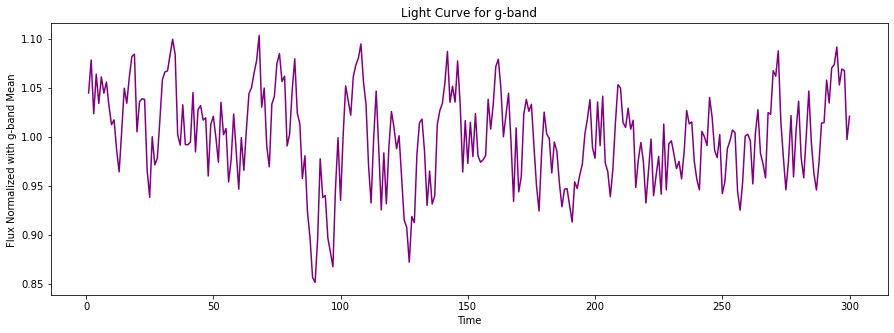

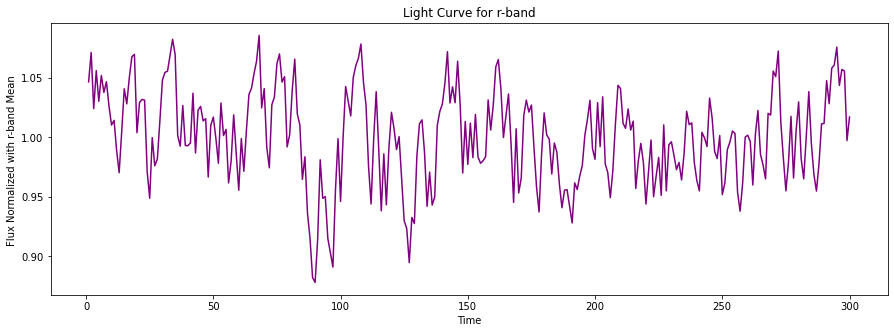

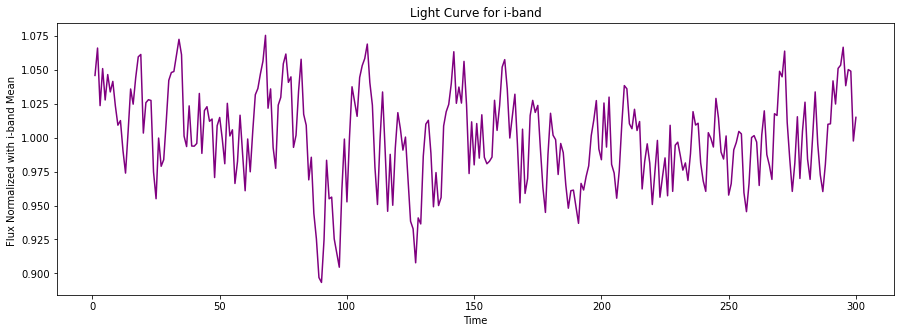

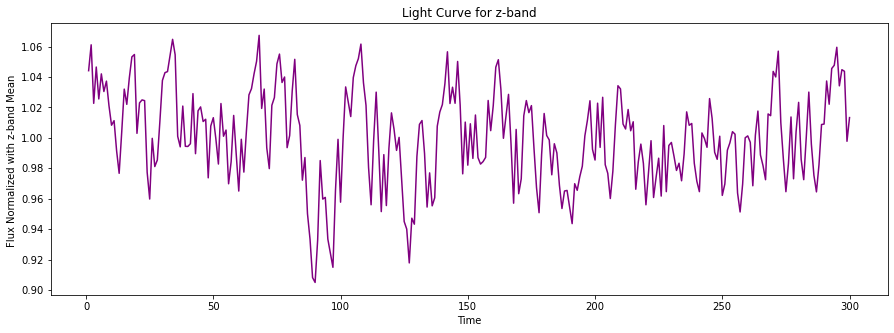

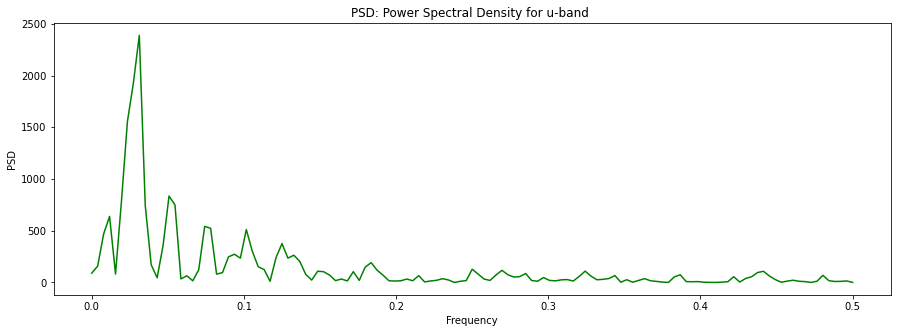

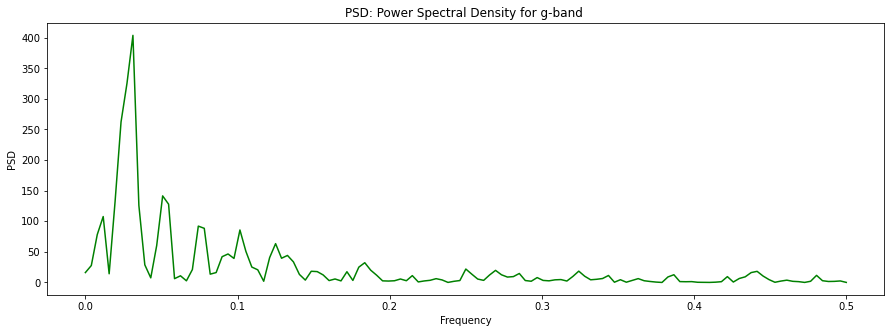

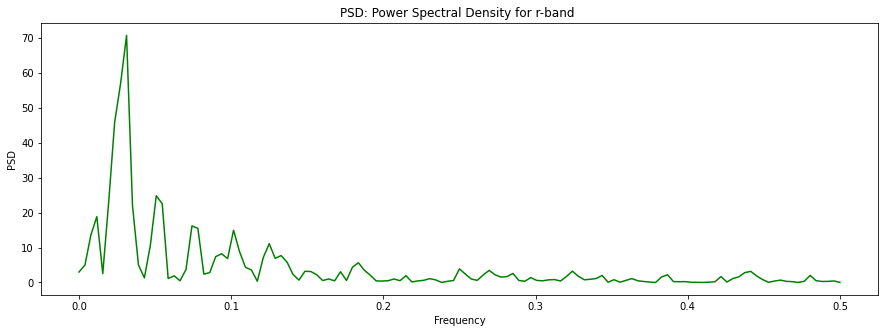

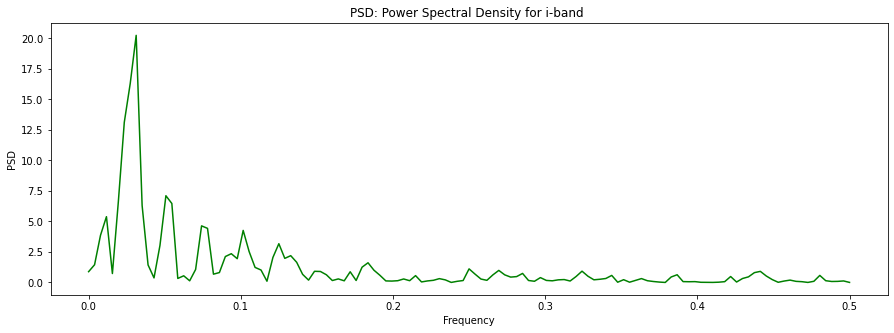

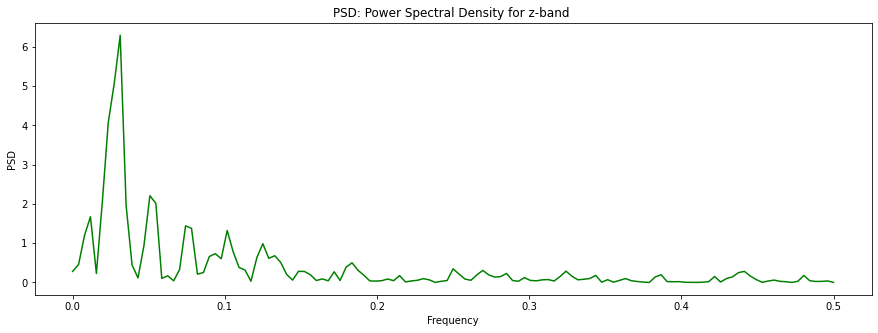

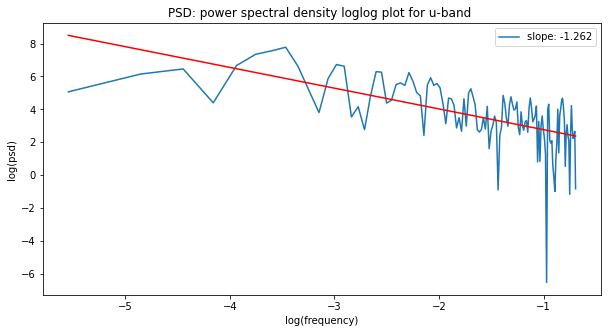


Slope: -1.2552282651425075 Intercept: -0.25028026295233224


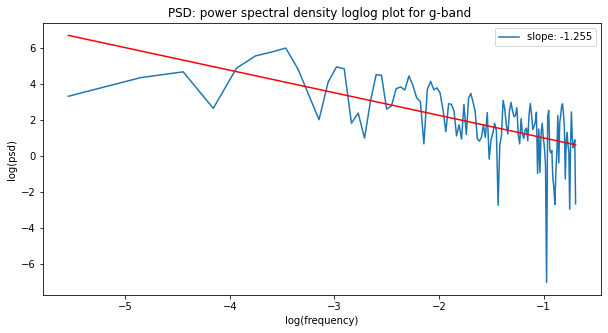


Slope: -1.252310515148787 Intercept: -1.980035115913006


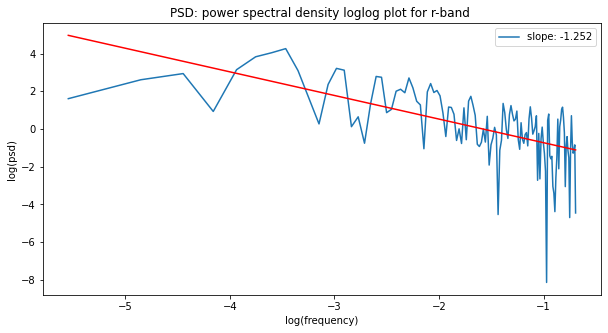


Slope: -1.251340456760567 Intercept: -3.228160112018901


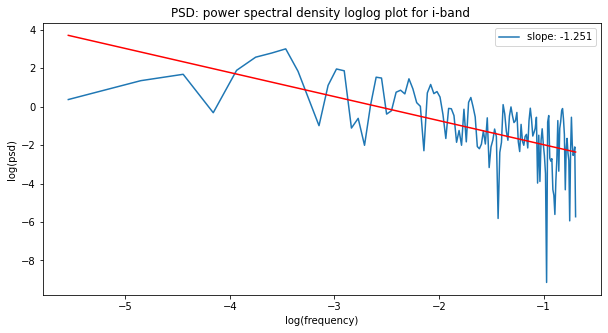


Slope: -1.250864767716031 Intercept: -4.395021608941717


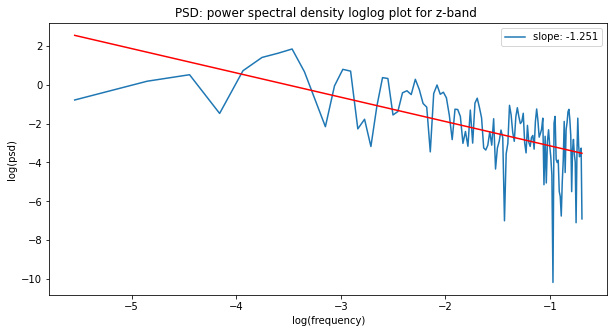


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.2211762479441406
u/r: 1.4745484264202704
u/i: 1.675487497221605
u/z: 1.87267185481061

g band

g/u: 0.8188826155794526
g/r: 1.207482072225597
g/i: 1.3720275840954987
g/z: 1.5334984265893372

r band

r/u: 0.6781737256521839
r/g: 0.828169645746233
r/i: 1.1362715982744291
r/z: 1.2699968487008972

i band

i/u: 0.5968412188442234
i/g: 0.7288483202465964
i/r: 0.8800712800695057
i/z: 1.117687752320437

z band

z/u: 0.5339963845941037
z/g: 0.6521037013543638
z/r: 0.7874035286173491
z/i: 0.8947042659489604



In [116]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
        c = 3.8
        b = 0.55
        phi = 0.7
        tstar = 25
        lambda1 = 350 / (red_g1 + 1)
        lambda2 = 470 / (red_g1 + 1)
        lambda3 = 620 / (red_g1 + 1)
        lambda4 = 750 / (red_g1 + 1)
        lambda5 = 890 / (red_g1 + 1)
        if(t<N):
            #Initial value of the AR(1) process... not sure why it is 4. 
            y1[0]=4
            #This is the m_n perturbation(AR(1)) term
            y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
            #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
        
            #This is the accretion rate term
            u1=(y1[t])**0.25
            uu.append(u1)
         
            #These are luminosities and come from the equation for Flux in section 3.3 
            L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
            L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
            L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
            L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
            L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
        
            #We find FLUX by integrating it over some distance
            flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
            flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
            flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
            flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
            flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
            #filling our previously empty arrays with the fluxes
            lum1.append(flux1)
            lum2.append(flux2)
            lum3.append(flux3)
            lum4.append(flux4)
            lum5.append(flux5)
            tm[r,x1]=t 
            output1[r,x1] = flux1 
            output2[r,x1] = flux2
            output3[r,x1] = flux3 
            output4[r,x1] = flux4
            output5[r,x1] = flux5
            yy.append(u1)  
            rr.append(rin[r])
            t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for REDSHIFT GROUP 1")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'rest-frame wavelength = '+ str(round(350 / (red_g1 + 1),3)))
plt.plot(rr, lum2, label = 'rest-frame wavelength = '+ str(round(470 / (red_g1 + 1),3)))
plt.plot(rr, lum3, label = 'rest-frame wavelength = '+ str(round(620 / (red_g1 + 1),3)))
plt.plot(rr, lum4, label = 'rest-frame wavelength = '+ str(round(750 / (red_g1 + 1),3)))
plt.plot(rr, lum5, label = 'rest-frame wavelength = '+ str(round(890 / (red_g1 + 1),3))) 
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux ') 
plt.title('flux vs radius for all bands')
plt.legend()

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'rest-frame wavelength = '+ str(round(350 / (red_g1 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'rest-frame wavelength = '+ str(round(470 / (red_g1 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'rest-frame wavelength = '+ str(round(620 / (red_g1 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'rest-frame wavelength = '+ str(round(750 / (red_g1 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'rest-frame wavelength = '+ str(round(890 / (red_g1 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_1 = light1
AV_g_1 = light2
AV_r_1 = light3
AV_i_1 = light4
AV_z_1 = light5


print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_1 = (AV_u_1 / AV_g_1)
R_AV_ur_1 = (AV_u_1 / AV_r_1)
R_AV_ui_1 = (AV_u_1 / AV_i_1)
R_AV_uz_1 = (AV_u_1 / AV_z_1)

print("u/g:", + R_AV_ug_1)
print("u/r:", + R_AV_ur_1)
print("u/i:", + R_AV_ui_1)
print("u/z:", + R_AV_uz_1)

print()
print("g band")
print()
R_AV_gu_1 = AV_g_1/AV_u_1
R_AV_gr_1 = AV_g_1/AV_r_1
R_AV_gi_1 = AV_g_1/AV_i_1
R_AV_gz_1 = AV_g_1/AV_z_1

print("g/u:", + R_AV_gu_1)
print("g/r:", + R_AV_gr_1)
print("g/i:", + R_AV_gi_1)
print("g/z:", + R_AV_gz_1)
print()

print("r band")
print()
R_AV_ru_1 = AV_r_1/AV_u_1
R_AV_rg_1 = AV_r_1/AV_g_1
R_AV_ri_1 = AV_r_1/AV_i_1
R_AV_rz_1 = AV_r_1/AV_z_1

print("r/u:", + R_AV_ru_1)
print("r/g:", + R_AV_rg_1)
print("r/i:", + R_AV_ri_1)
print("r/z:", + R_AV_rz_1)
print()

print("i band")
print()
R_AV_iu_1 = AV_i_1/AV_u_1
R_AV_ig_1 = AV_i_1/AV_g_1
R_AV_ir_1 = AV_i_1/AV_r_1
R_AV_iz_1 = AV_i_1/AV_z_1

print("i/u:", + R_AV_iu_1)
print("i/g:", + R_AV_ig_1)
print("i/r:", + R_AV_ir_1)
print("i/z:", + R_AV_iz_1)
print()

print("z band")
print()
R_AV_zu_1 = AV_z_1/AV_u_1
R_AV_zg_1 = AV_z_1/AV_g_1
R_AV_zr_1 = AV_z_1/AV_r_1
R_AV_zi_1 = AV_z_1/AV_i_1

print("z/u:", + R_AV_zu_1)
print("z/g:", + R_AV_zg_1)
print("z/r:", + R_AV_zr_1)
print("z/i:", + R_AV_zi_1)
print()


BEGINNING OF PLOTTING AND CALCULATIONS for REDSHIFT GROUP 2

PLOTTING




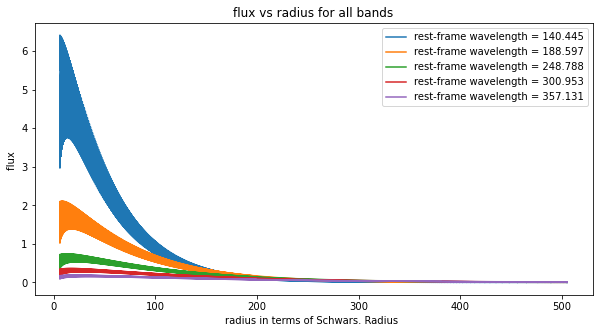

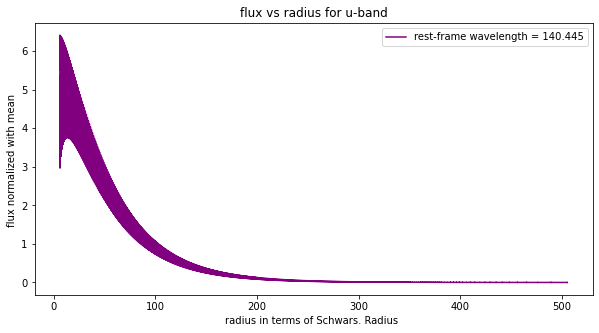

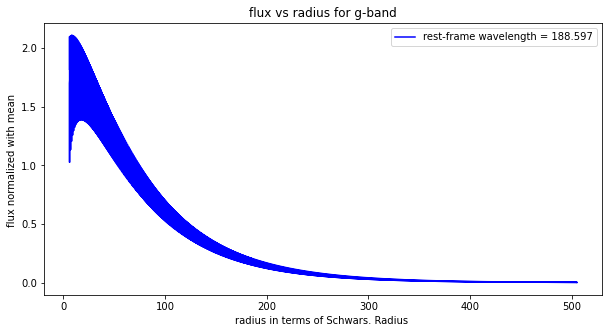

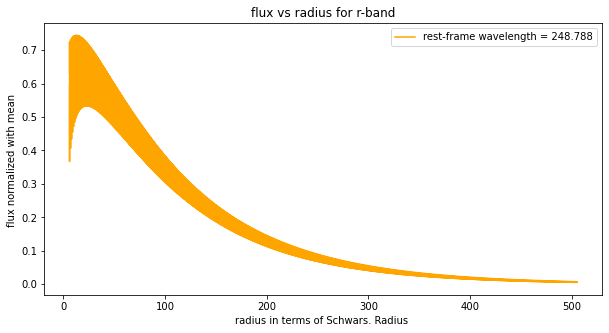

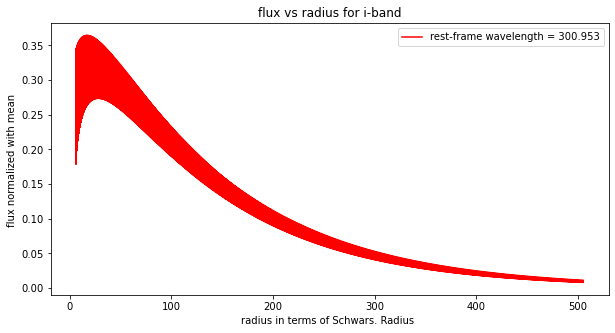

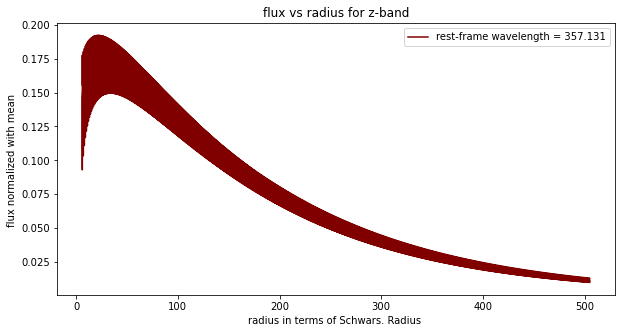


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs

Slope: -1.1709401732758262 Intercept: 3.810291732333176


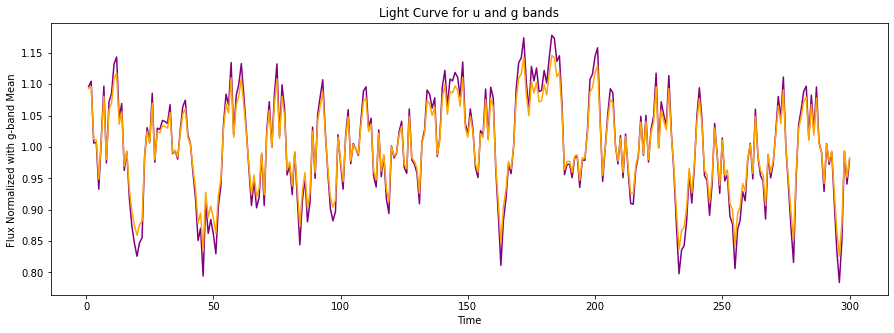

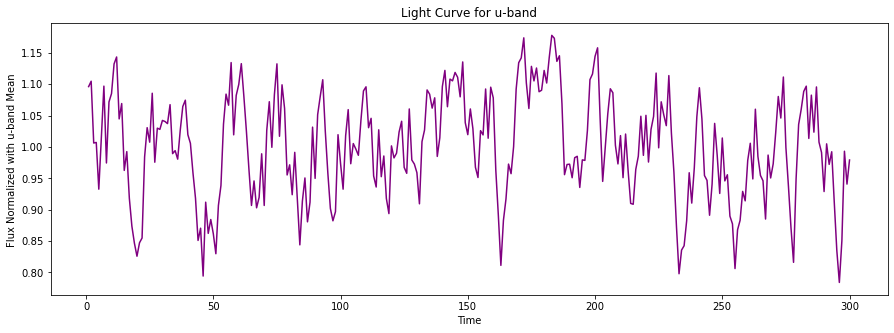

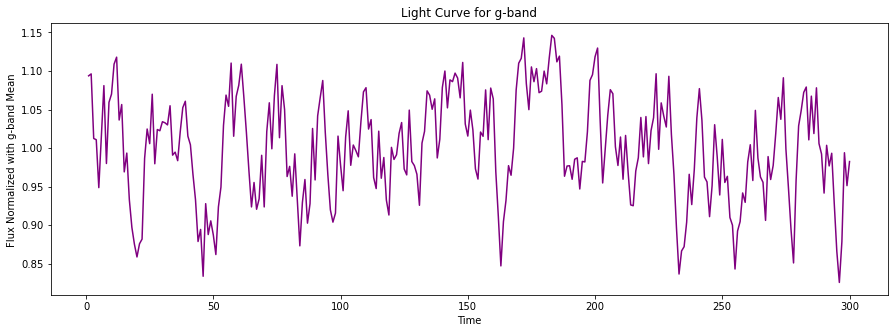

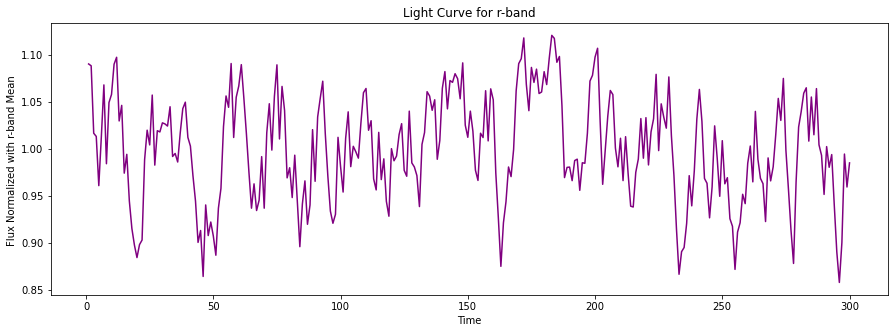

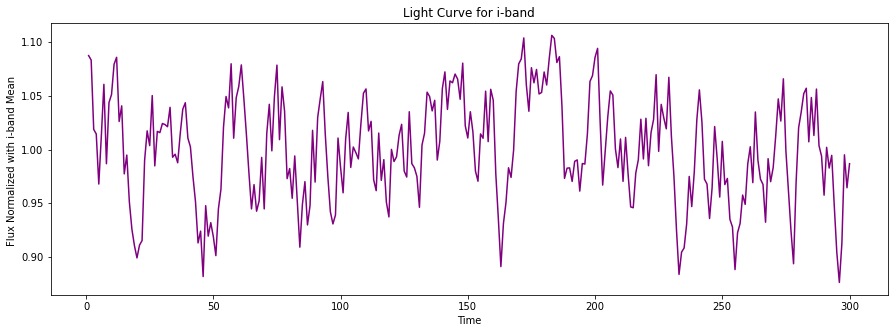

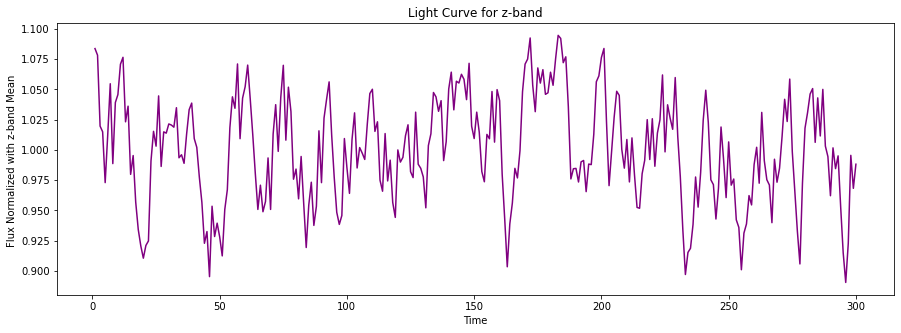

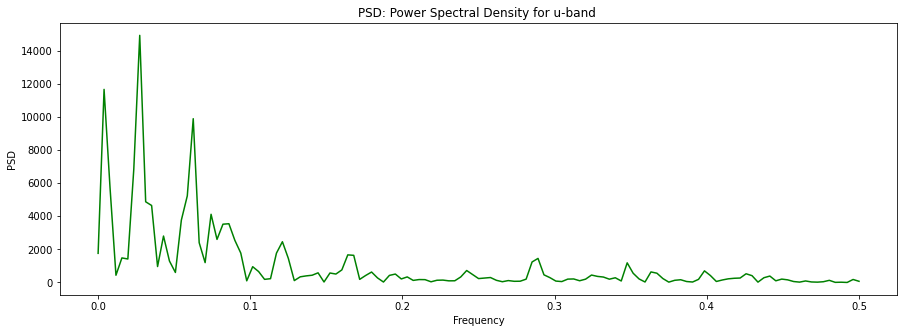

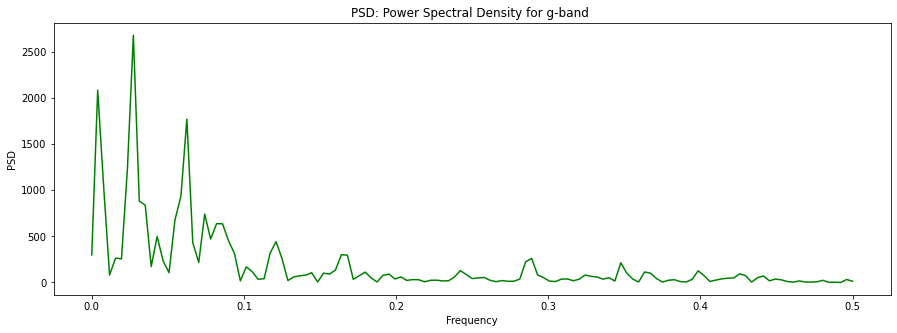

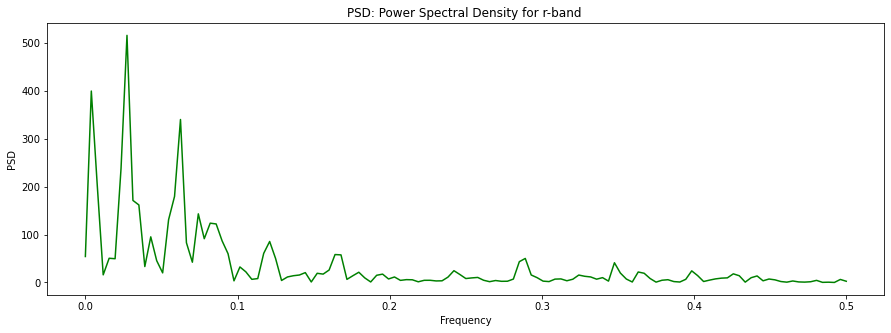

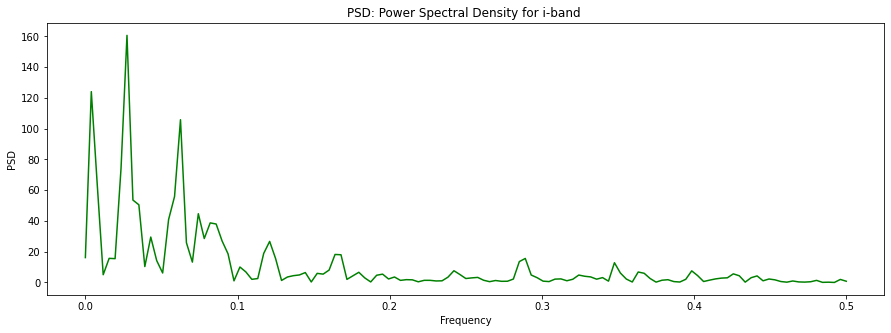

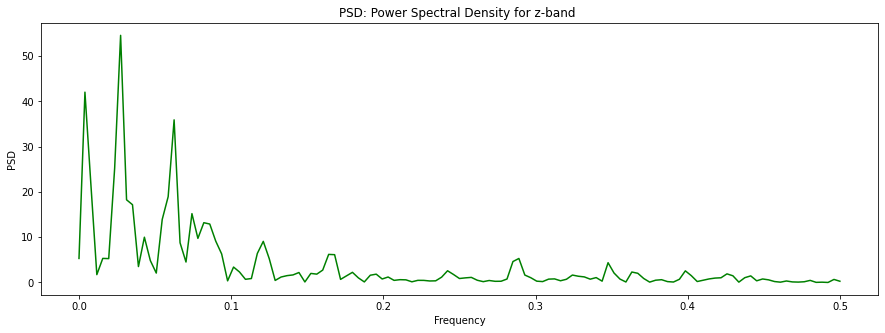

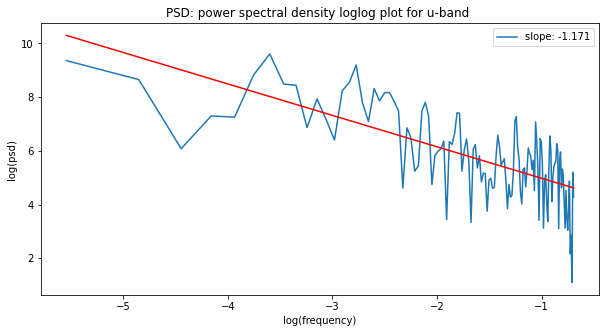


Slope: -1.1721646257518172 Intercept: 2.091536964504209


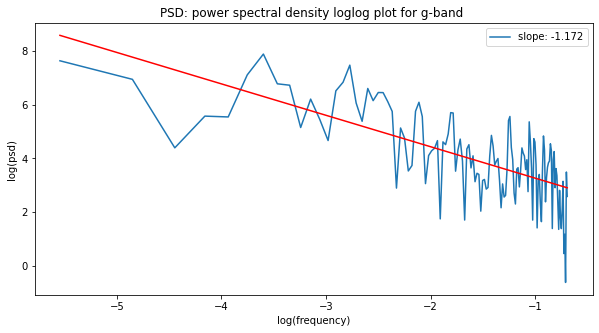


Slope: -1.1732242375201325 Intercept: 0.4405610835773847


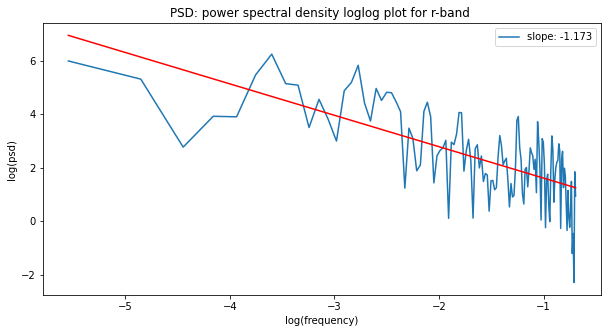


Slope: -1.1738101832067034 Intercept: -0.7251985194225197


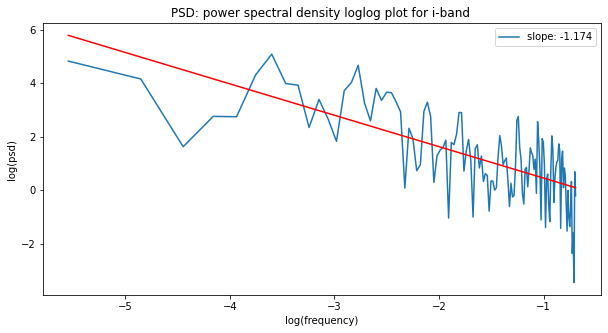


Slope: -1.1742073925253849 Intercept: -1.8053391750966534


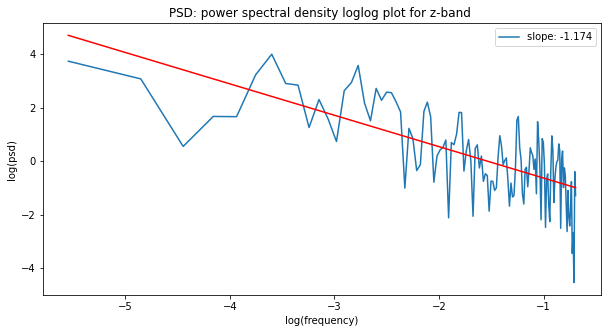


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.2246875669033308
u/r: 1.4820850980093094
u/i: 1.6906375228220414
u/z: 1.9027527332786638

g band

g/u: 0.8165347857074585
g/r: 1.2101740379032493
g/i: 1.3804643474064842
g/z: 1.5536637953219747

r band

r/u: 0.6747250892294706
r/g: 0.8263274278570731
r/i: 1.140715553440793
r/z: 1.2838350077430654

i band

i/u: 0.5914928460423513
i/g: 0.7243939344603337
i/r: 0.8766427326984837
i/z: 1.12546462952186

z band

z/u: 0.5255543626401125
z/g: 0.6436398936571501
z/r: 0.7789162890626913
z/i: 0.8885219257621965



In [105]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
        c = 3.8
        b = 0.55
        phi = 0.7
        tstar = 25
        lambda1 = 350 / (red_g2 + 1)
        lambda2 = 470 / (red_g2 + 1)
        lambda3 = 620 / (red_g2 + 1)
        lambda4 = 750 / (red_g2 + 1)
        lambda5 = 890 / (red_g2 + 1)
        if(t<N):
            #Initial value of the AR(1) process... not sure why it is 4. 
            y1[0]=4
            #This is the m_n perturbation(AR(1)) term
            y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
            #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
        
            #This is the accretion rate term
            u1=(y1[t])**0.25
            uu.append(u1)
         
            #These are luminosities and come from the equation for Flux in section 3.3 
            L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
            L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
            L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
            L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
            L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
        
            #We find FLUX by integrating it over some distance
            flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
            flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
            flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
            flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
            flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
            #filling our previously empty arrays with the fluxes
            lum1.append(flux1)
            lum2.append(flux2)
            lum3.append(flux3)
            lum4.append(flux4)
            lum5.append(flux5)
            tm[r,x1]=t 
            output1[r,x1] = flux1 
            output2[r,x1] = flux2
            output3[r,x1] = flux3 
            output4[r,x1] = flux4
            output5[r,x1] = flux5
            yy.append(u1)  
            rr.append(rin[r])
            t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for REDSHIFT GROUP 2")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'rest-frame wavelength = '+ str(round(350 / (red_g2 + 1),3)))
plt.plot(rr, lum2, label = 'rest-frame wavelength = '+ str(round(470 / (red_g2 + 1),3)))
plt.plot(rr, lum3, label = 'rest-frame wavelength = '+ str(round(620 / (red_g2 + 1),3)))
plt.plot(rr, lum4, label = 'rest-frame wavelength = '+ str(round(750 / (red_g2 + 1),3)))
plt.plot(rr, lum5, label = 'rest-frame wavelength = '+ str(round(890 / (red_g2 + 1),3))) 
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux ') 
plt.title('flux vs radius for all bands')
plt.legend()

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'rest-frame wavelength = '+ str(round(350 / (red_g2 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'rest-frame wavelength = '+ str(round(470 / (red_g2 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'rest-frame wavelength = '+ str(round(620 / (red_g2 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'rest-frame wavelength = '+ str(round(750 / (red_g2 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'rest-frame wavelength = '+ str(round(890 / (red_g2 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_2 = light1
AV_g_2 = light2
AV_r_2 = light3
AV_i_2 = light4
AV_z_2 = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_2 = (AV_u_2 / AV_g_2)
R_AV_ur_2 = (AV_u_2 / AV_r_2)
R_AV_ui_2 = (AV_u_2 / AV_i_2)
R_AV_uz_2 = (AV_u_2 / AV_z_2)

print("u/g:", + R_AV_ug_2)
print("u/r:", + R_AV_ur_2)
print("u/i:", + R_AV_ui_2)
print("u/z:", + R_AV_uz_2)

print()
print("g band")
print()
R_AV_gu_2 = AV_g_2/AV_u_2
R_AV_gr_2 = AV_g_2/AV_r_2
R_AV_gi_2 = AV_g_2/AV_i_2
R_AV_gz_2 = AV_g_2/AV_z_2

print("g/u:", + R_AV_gu_2)
print("g/r:", + R_AV_gr_2)
print("g/i:", + R_AV_gi_2)
print("g/z:", + R_AV_gz_2)
print()

print("r band")
print()
R_AV_ru_2 = AV_r_2/AV_u_2
R_AV_rg_2 = AV_r_2/AV_g_2
R_AV_ri_2 = AV_r_2/AV_i_2
R_AV_rz_2 = AV_r_2/AV_z_2

print("r/u:", + R_AV_ru_2)
print("r/g:", + R_AV_rg_2)
print("r/i:", + R_AV_ri_2)
print("r/z:", + R_AV_rz_2)
print()

print("i band")
print()
R_AV_iu_2 = AV_i_2/AV_u_2
R_AV_ig_2 = AV_i_2/AV_g_2
R_AV_ir_2 = AV_i_2/AV_r_2
R_AV_iz_2 = AV_i_2/AV_z_2

print("i/u:", + R_AV_iu_2)
print("i/g:", + R_AV_ig_2)
print("i/r:", + R_AV_ir_2)
print("i/z:", + R_AV_iz_2)
print()

print("z band")
print()
R_AV_zu_2 = AV_z_2/AV_u_2
R_AV_zg_2 = AV_z_2/AV_g_2
R_AV_zr_2 = AV_z_2/AV_r_2
R_AV_zi_2 = AV_z_2/AV_i_2

print("z/u:", + R_AV_zu_2)
print("z/g:", + R_AV_zg_2)
print("z/r:", + R_AV_zr_2)
print("z/i:", + R_AV_zi_2)
print()


BEGINNING OF PLOTTING AND CALCULATIONS for REDSHIFT GROUP 3

PLOTTING




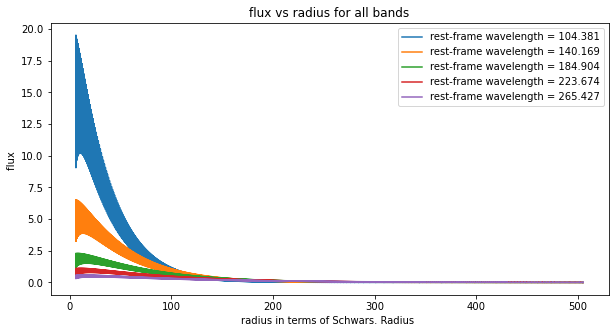

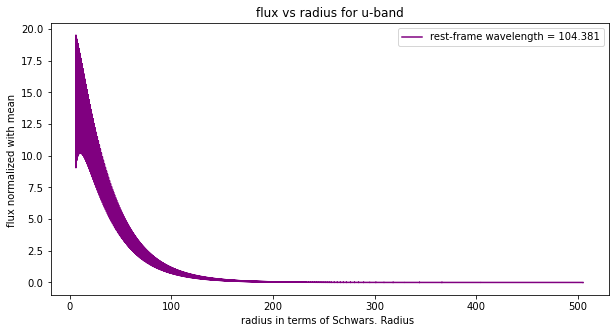

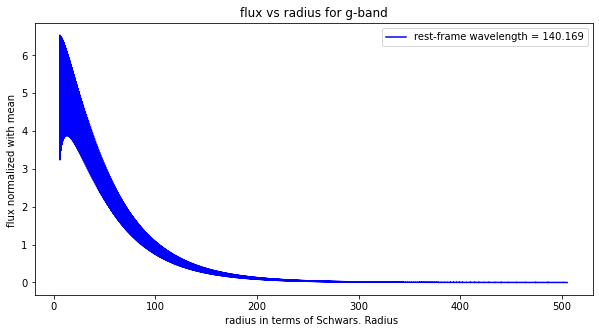

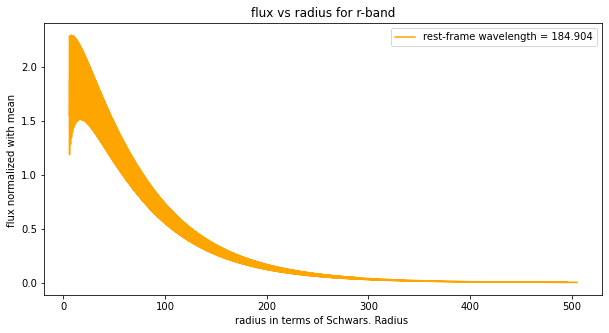

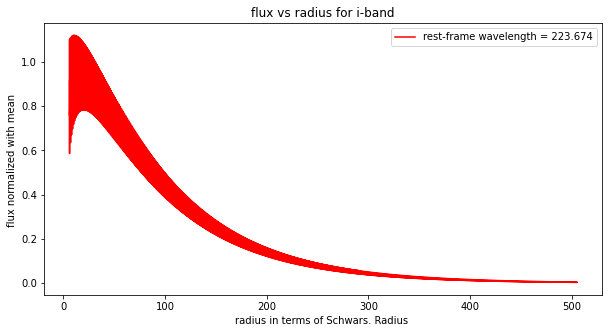

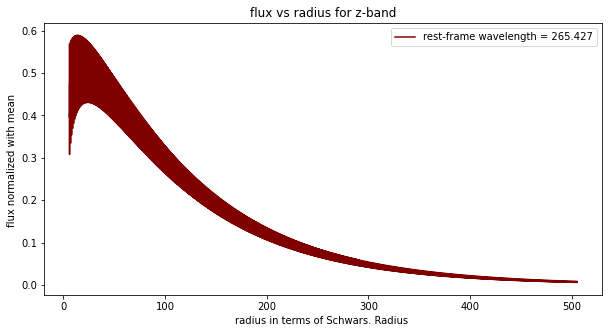


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs

Slope: -1.0354165896928502 Intercept: 5.628412052859758


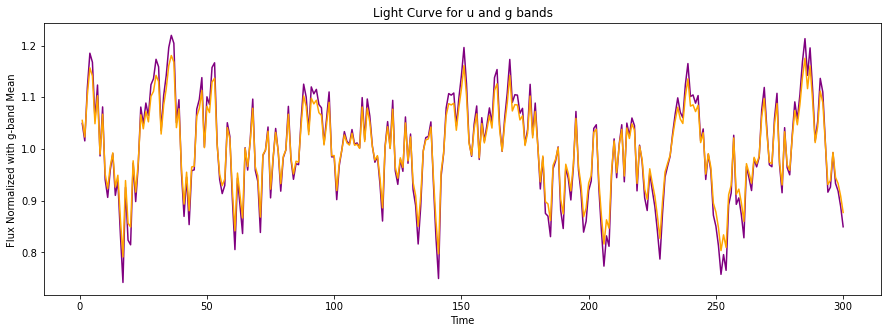

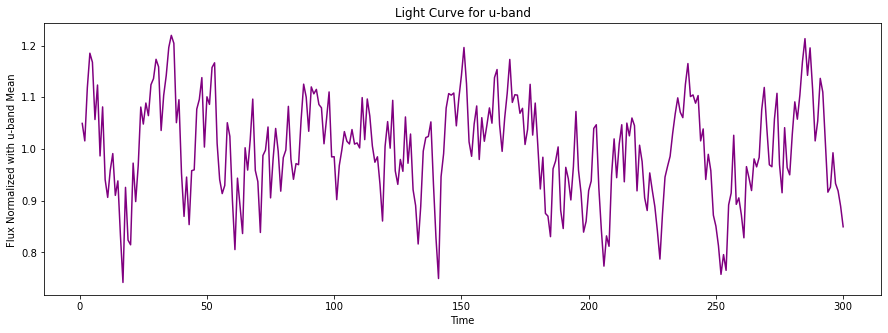

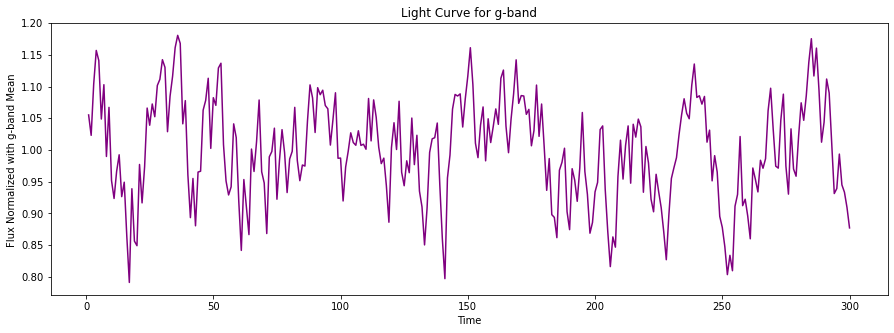

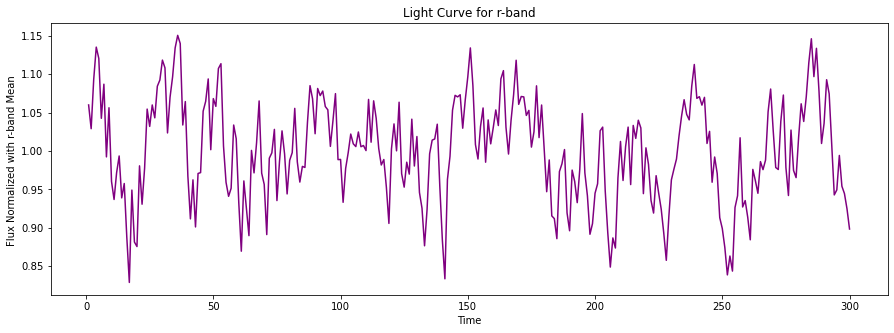

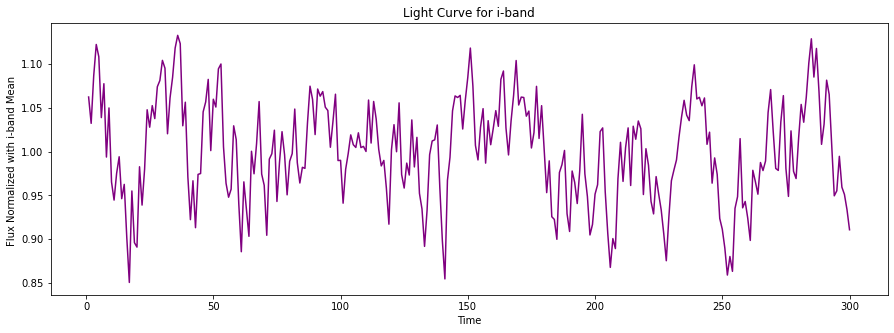

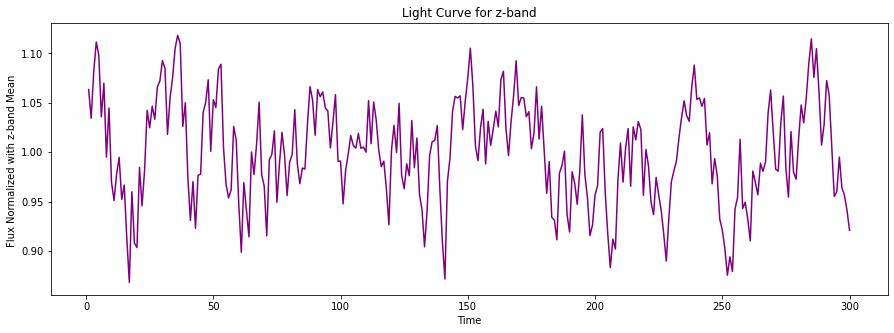

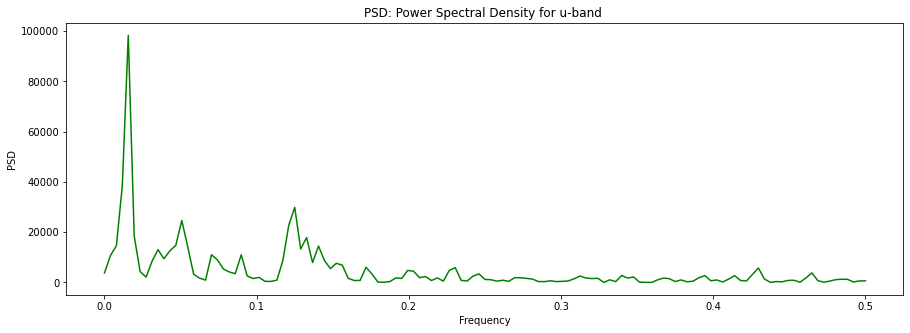

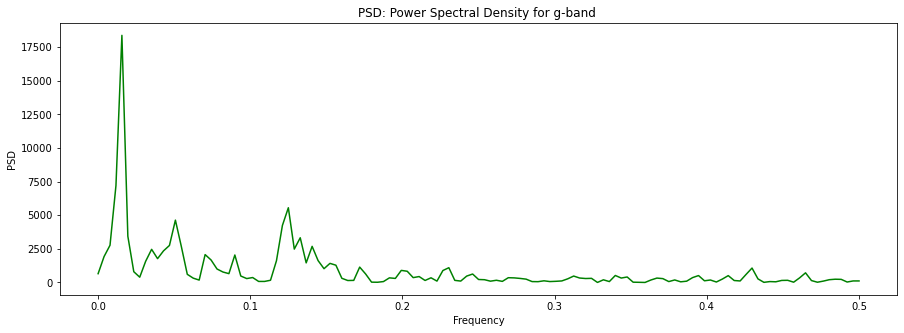

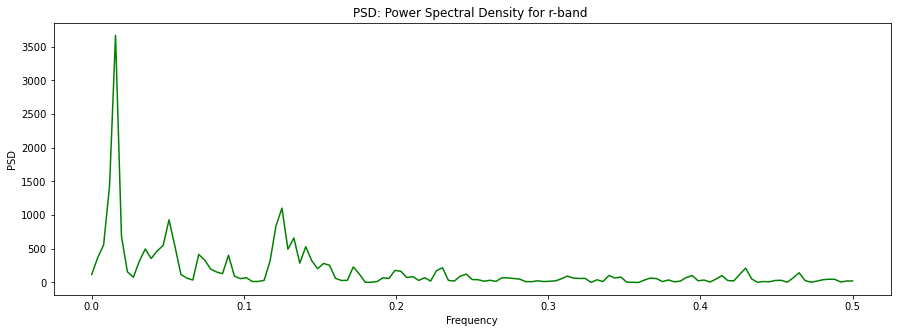

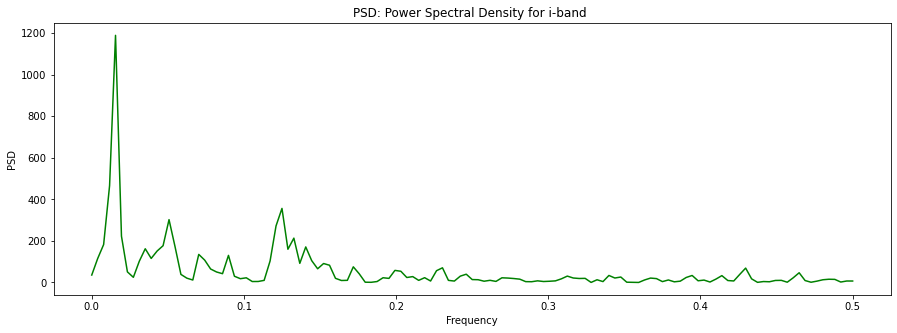

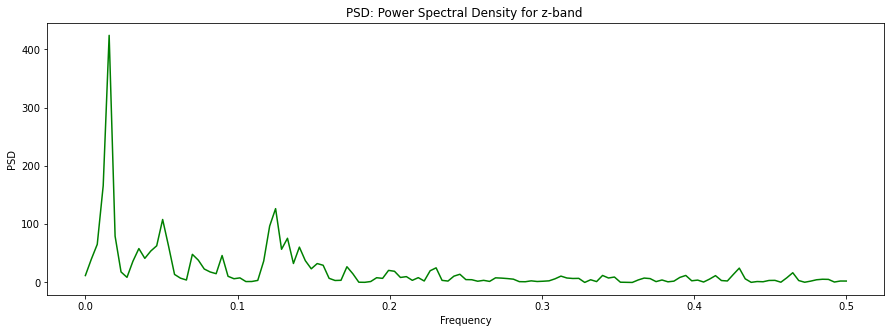

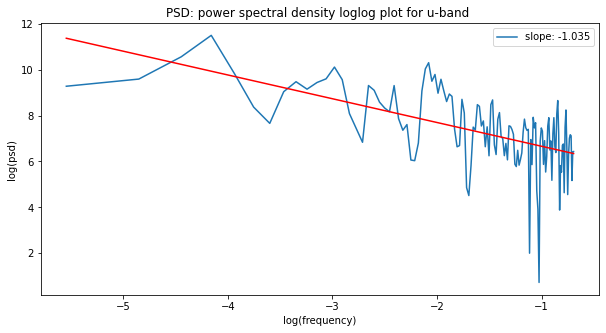


Slope: -1.0339287504569699 Intercept: 3.94922675142707


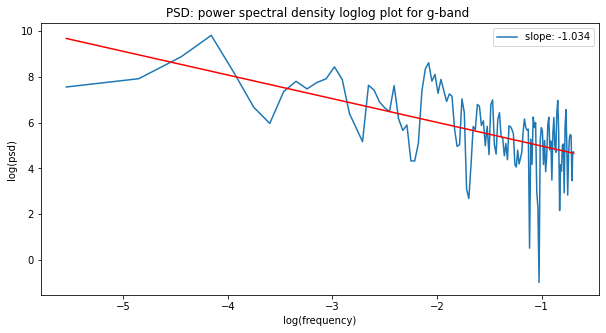


Slope: -1.031481367442133 Intercept: 2.3389435560103293


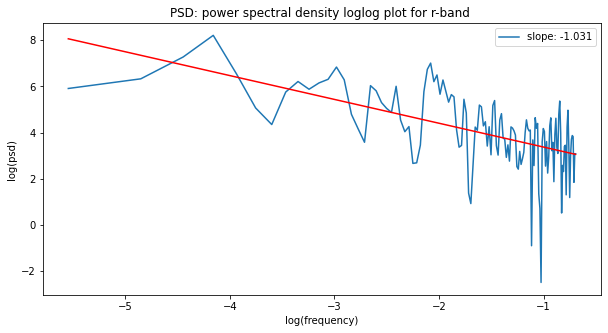


Slope: -1.0293946834402503 Intercept: 1.2142855559097596


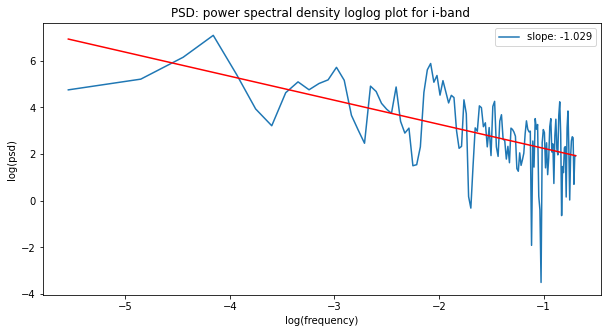


Slope: -1.0274686430982538 Intercept: 0.1851825224715726


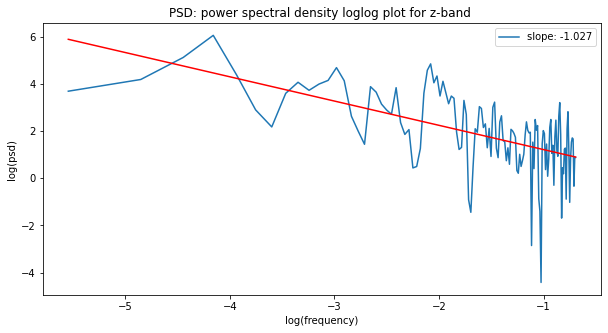


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.221440076307051
u/r: 1.4726496592231009
u/i: 1.6750129514983212
u/z: 1.8816357742187177

g band

g/u: 0.8187057387403225
g/r: 1.2056667271599328
g/i: 1.371342715856041
g/z: 1.5405060065719538

r band

r/u: 0.6790481318737763
r/g: 0.8294166020120658
r/i: 1.1374144155793153
r/z: 1.2777212573500871

i band

i/u: 0.5970103091474528
i/g: 0.7292123175611608
i/r: 0.8791870283186743
i/z: 1.1233559552692232

z band

z/u: 0.5314524807093521
z/g: 0.6491373585912027
z/r: 0.7826433146098991
z/i: 0.8901897882940766



In [101]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
        c = 3.8
        b = 0.55
        phi = 0.7
        tstar = 25
        lambda1 = 350 / (red_g3 + 1)
        lambda2 = 470 / (red_g3 + 1)
        lambda3 = 620 / (red_g3 + 1)
        lambda4 = 750 / (red_g3 + 1)
        lambda5 = 890 / (red_g3 + 1)
        if(t<N):
            #Initial value of the AR(1) process... not sure why it is 4. 
            y1[0]=4
            #This is the m_n perturbation(AR(1)) term
            y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
            #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
        
            #This is the accretion rate term
            u1=(y1[t])**0.25
            uu.append(u1)
         
            #These are luminosities and come from the equation for Flux in section 3.3 
            L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
            L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
            L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
            L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
            L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
        
            #We find FLUX by integrating it over some distance
            flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
            flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
            flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
            flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
            flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
            #filling our previously empty arrays with the fluxes
            lum1.append(flux1)
            lum2.append(flux2)
            lum3.append(flux3)
            lum4.append(flux4)
            lum5.append(flux5)
            tm[r,x1]=t 
            output1[r,x1] = flux1 
            output2[r,x1] = flux2
            output3[r,x1] = flux3 
            output4[r,x1] = flux4
            output5[r,x1] = flux5
            yy.append(u1)  
            rr.append(rin[r])
            t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for REDSHIFT GROUP 3")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'rest-frame wavelength = '+ str(round(350 / (red_g3 + 1),3)))
plt.plot(rr, lum2, label = 'rest-frame wavelength = '+ str(round(470 / (red_g3 + 1),3)))
plt.plot(rr, lum3, label = 'rest-frame wavelength = '+ str(round(620 / (red_g3 + 1),3)))
plt.plot(rr, lum4, label = 'rest-frame wavelength = '+ str(round(750 / (red_g3 + 1),3)))
plt.plot(rr, lum5, label = 'rest-frame wavelength = '+ str(round(890 / (red_g3 + 1),3))) 
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux ') 
plt.title('flux vs radius for all bands')
plt.legend()

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'rest-frame wavelength = '+ str(round(350 / (red_g3 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'rest-frame wavelength = '+ str(round(470 / (red_g3 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'rest-frame wavelength = '+ str(round(620 / (red_g3 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'rest-frame wavelength = '+ str(round(750 / (red_g3 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'rest-frame wavelength = '+ str(round(890 / (red_g3 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_3 = light1
AV_g_3 = light2
AV_r_3 = light3
AV_i_3 = light4
AV_z_3 = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_3 = (AV_u_3 / AV_g_3)
R_AV_ur_3 = (AV_u_3 / AV_r_3)
R_AV_ui_3 = (AV_u_3 / AV_i_3)
R_AV_uz_3 = (AV_u_3 / AV_z_3)

print("u/g:", + R_AV_ug_3)
print("u/r:", + R_AV_ur_3)
print("u/i:", + R_AV_ui_3)
print("u/z:", + R_AV_uz_3)

print()
print("g band")
print()
R_AV_gu_3 = AV_g_3/AV_u_3
R_AV_gr_3 = AV_g_3/AV_r_3
R_AV_gi_3 = AV_g_3/AV_i_3
R_AV_gz_3 = AV_g_3/AV_z_3

print("g/u:", + R_AV_gu_3)
print("g/r:", + R_AV_gr_3)
print("g/i:", + R_AV_gi_3)
print("g/z:", + R_AV_gz_3)
print()

print("r band")
print()
R_AV_ru_3 = AV_r_3/AV_u_3
R_AV_rg_3 = AV_r_3/AV_g_3
R_AV_ri_3 = AV_r_3/AV_i_3
R_AV_rz_3 = AV_r_3/AV_z_3

print("r/u:", + R_AV_ru_3)
print("r/g:", + R_AV_rg_3)
print("r/i:", + R_AV_ri_3)
print("r/z:", + R_AV_rz_3)
print()

print("i band")
print()
R_AV_iu_3 = AV_i_3/AV_u_3
R_AV_ig_3 = AV_i_3/AV_g_3
R_AV_ir_3 = AV_i_3/AV_r_3
R_AV_iz_3 = AV_i_3/AV_z_3

print("i/u:", + R_AV_iu_3)
print("i/g:", + R_AV_ig_3)
print("i/r:", + R_AV_ir_3)
print("i/z:", + R_AV_iz_3)
print()

print("z band")
print()
R_AV_zu_3 = AV_z_3/AV_u_3
R_AV_zg_3 = AV_z_3/AV_g_3
R_AV_zr_3 = AV_z_3/AV_r_3
R_AV_zi_3 = AV_z_3/AV_i_3

print("z/u:", + R_AV_zu_3)
print("z/g:", + R_AV_zg_3)
print("z/r:", + R_AV_zr_3)
print("z/i:", + R_AV_zi_3)
print()


BEGINNING OF PLOTTING AND CALCULATIONS for REDSHIFT GROUP 4

PLOTTING




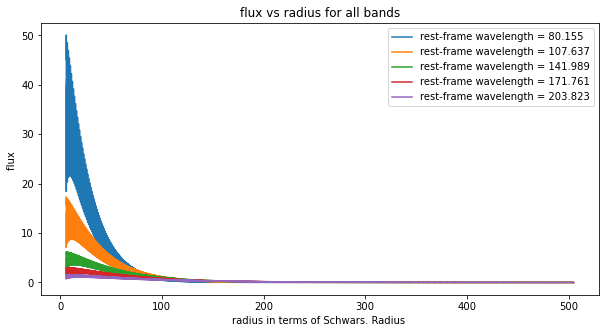

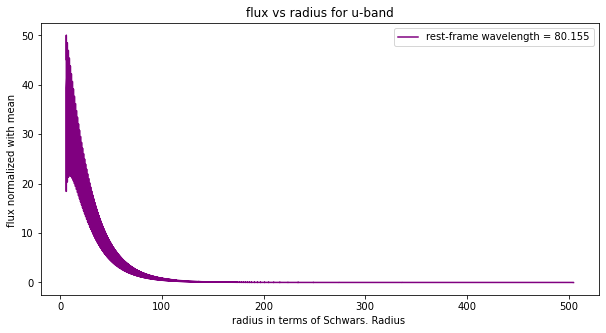

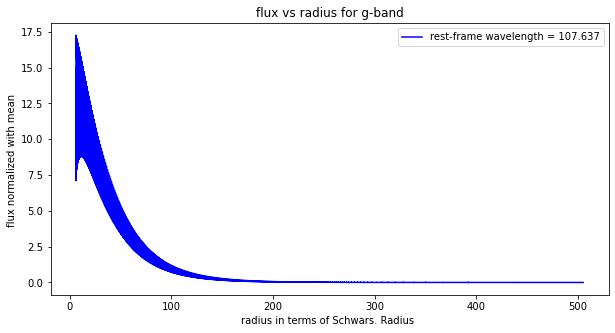

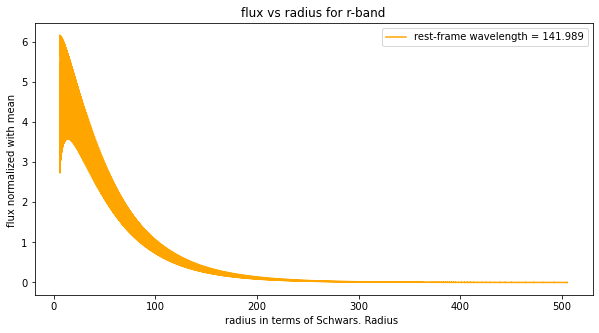

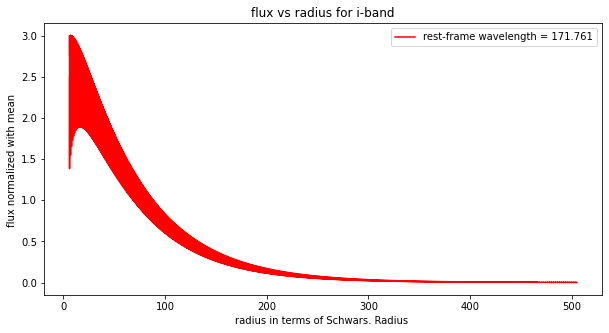

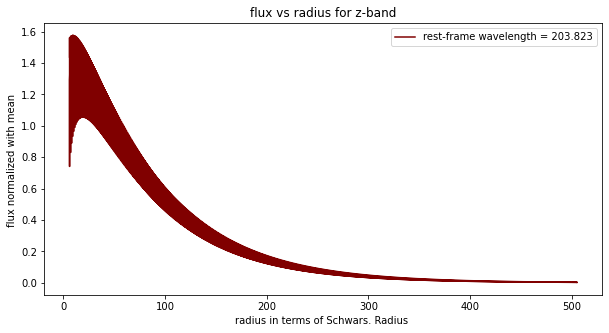


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs

Slope: -1.1218788430231588 Intercept: 7.133207719188222


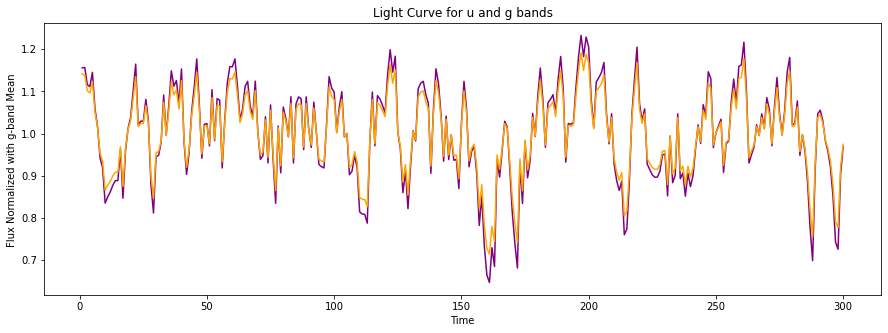

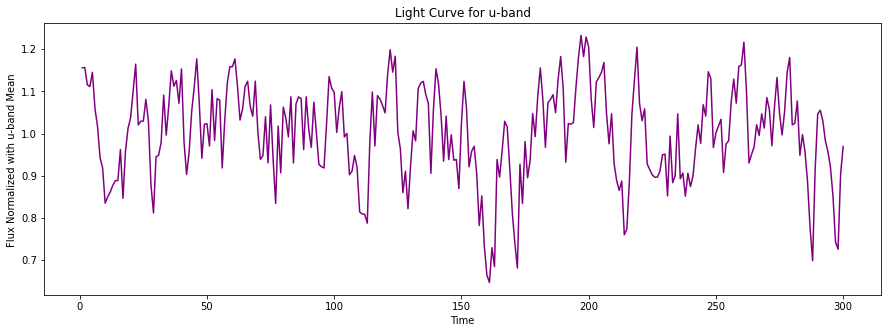

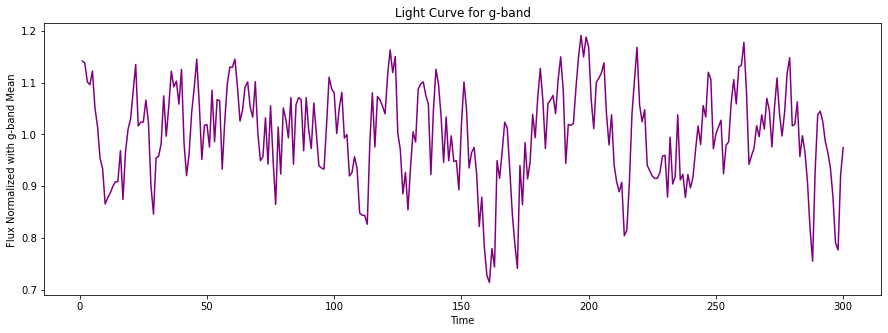

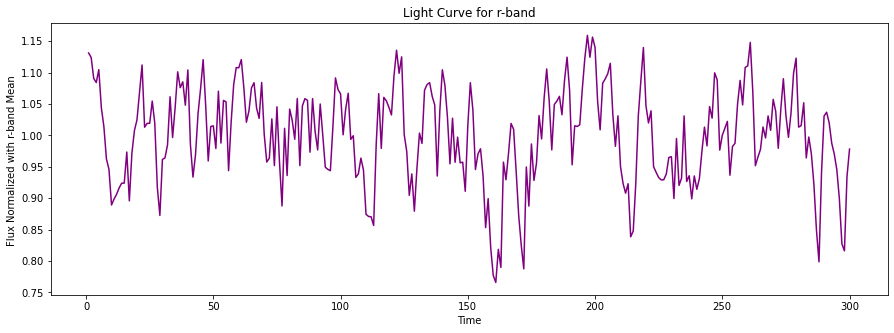

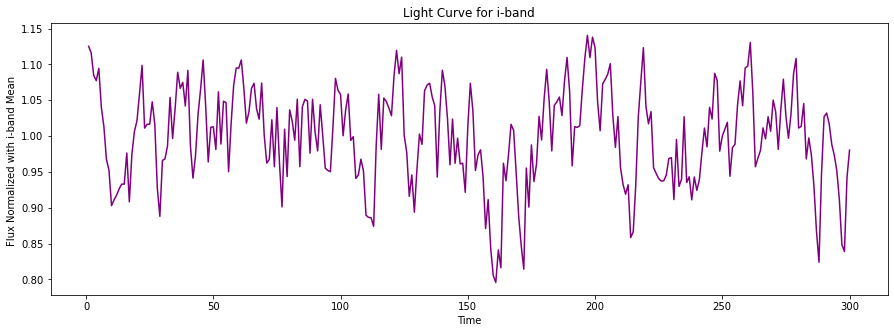

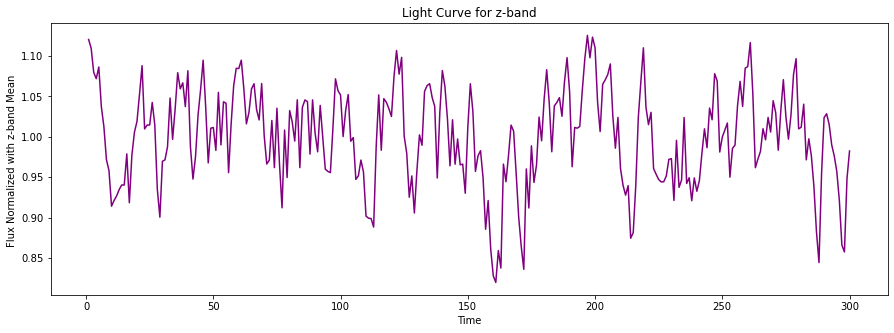

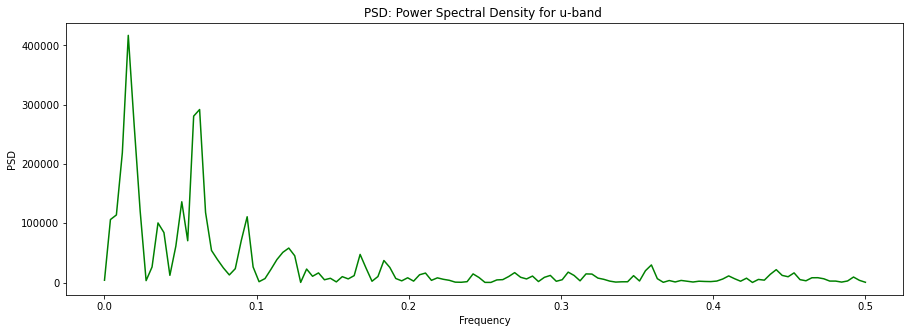

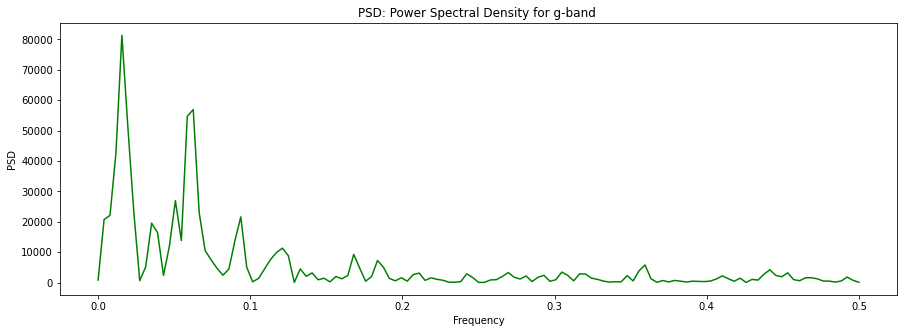

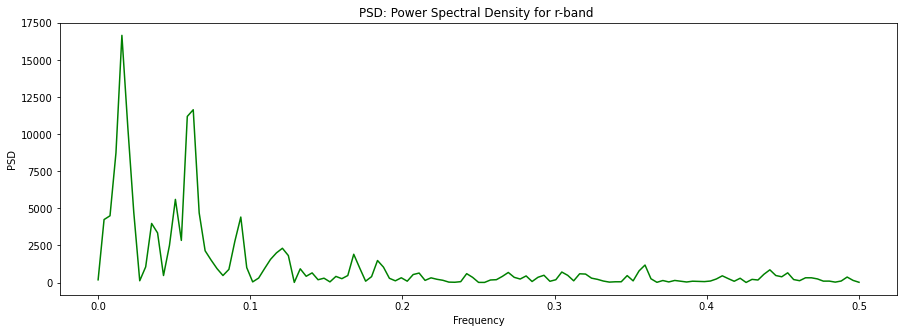

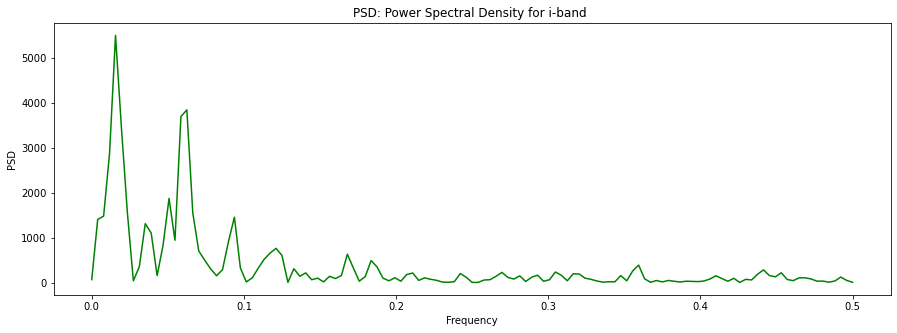

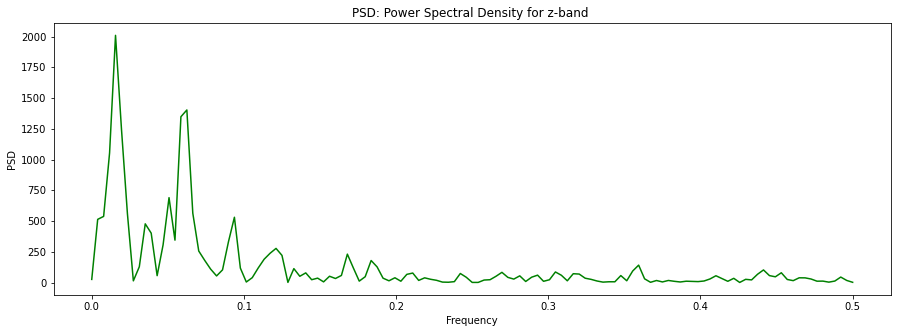

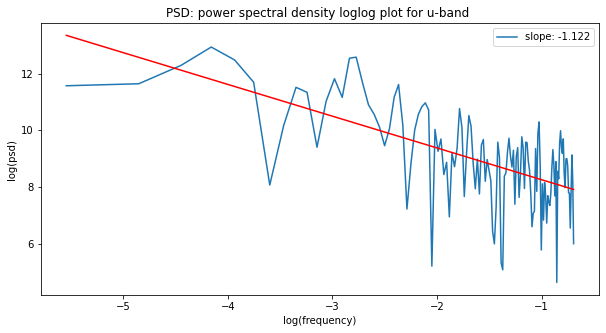


Slope: -1.1197299408695045 Intercept: 5.502550475703488


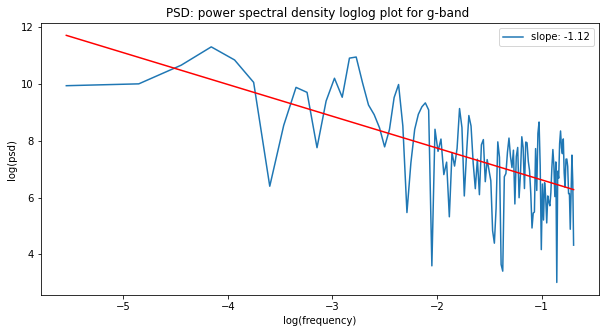


Slope: -1.1171298037785835 Intercept: 3.9243119881512882


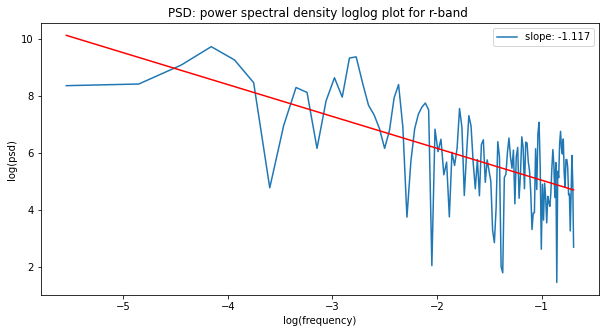


Slope: -1.1152473411977744 Intercept: 2.820234601688418


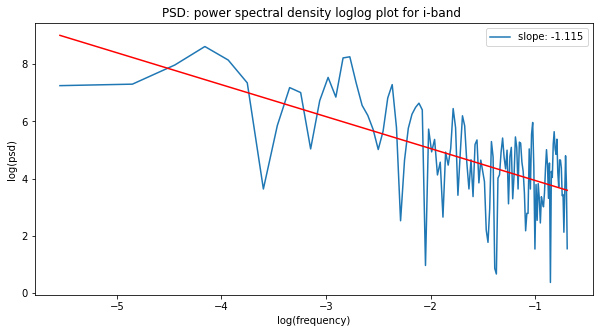


Slope: -1.113602519805461 Intercept: 1.8149017982632232


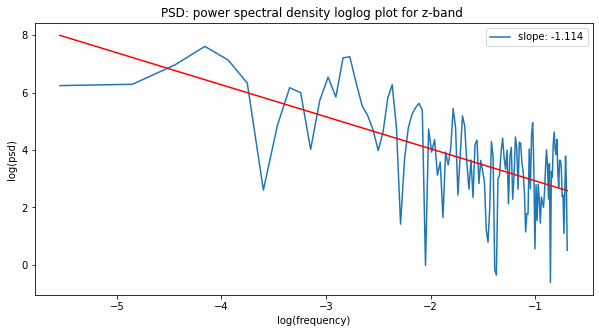


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.221361291167291
u/r: 1.4709514255401956
u/i: 1.6706437931843938
u/z: 1.873335015315986

g band

g/u: 0.8187585501782774
g/r: 1.2043540565579607
g/i: 1.367853889971992
g/z: 1.5338090611383177

r band

r/u: 0.6798321022958034
r/g: 0.8303206142369762
r/i: 1.1357572821079818
r/z: 1.2735532817666078

i band

i/u: 0.5985716429077393
i/g: 0.7310722346379231
i/r: 0.880469811423076
i/z: 1.1213252178342847

z band

z/u: 0.5338073498996251
z/g: 0.651971634107996
z/r: 0.7852046822986875
z/i: 0.8918019358660185



In [102]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
        c = 3.8
        b = 0.55
        phi = 0.7
        tstar = 25
        lambda1 = 350 / (red_g4 + 1)
        lambda2 = 470 / (red_g4 + 1)
        lambda3 = 620 / (red_g4 + 1)
        lambda4 = 750 / (red_g4 + 1)
        lambda5 = 890 / (red_g4 + 1)
        if(t<N):
            #Initial value of the AR(1) process... not sure why it is 4. 
            y1[0]=4
            #This is the m_n perturbation(AR(1)) term
            y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
            #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
        
            #This is the accretion rate term
            u1=(y1[t])**0.25
            uu.append(u1)
         
            #These are luminosities and come from the equation for Flux in section 3.3 
            L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
            L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
            L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
            L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
            L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
        
            #We find FLUX by integrating it over some distance
            flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
            flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
            flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
            flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
            flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
            #filling our previously empty arrays with the fluxes
            lum1.append(flux1)
            lum2.append(flux2)
            lum3.append(flux3)
            lum4.append(flux4)
            lum5.append(flux5)
            tm[r,x1]=t 
            output1[r,x1] = flux1 
            output2[r,x1] = flux2
            output3[r,x1] = flux3 
            output4[r,x1] = flux4
            output5[r,x1] = flux5
            yy.append(u1)  
            rr.append(rin[r])
            t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for REDSHIFT GROUP 4")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'rest-frame wavelength = '+ str(round(350 / (red_g4 + 1),3)))
plt.plot(rr, lum2, label = 'rest-frame wavelength = '+ str(round(470 / (red_g4 + 1),3)))
plt.plot(rr, lum3, label = 'rest-frame wavelength = '+ str(round(620 / (red_g4 + 1),3)))
plt.plot(rr, lum4, label = 'rest-frame wavelength = '+ str(round(750 / (red_g4 + 1),3)))
plt.plot(rr, lum5, label = 'rest-frame wavelength = '+ str(round(890 / (red_g4 + 1),3))) 
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux ') 
plt.title('flux vs radius for all bands')
plt.legend()

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'rest-frame wavelength = '+ str(round(350 / (red_g4 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'rest-frame wavelength = '+ str(round(470 / (red_g4 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'rest-frame wavelength = '+ str(round(620 / (red_g4 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'rest-frame wavelength = '+ str(round(750 / (red_g4 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'rest-frame wavelength = '+ str(round(890 / (red_g4 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_4 = light1
AV_g_4 = light2
AV_r_4 = light3
AV_i_4 = light4
AV_z_4 = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_4 = (AV_u_4 / AV_g_4)
R_AV_ur_4 = (AV_u_4 / AV_r_4)
R_AV_ui_4 = (AV_u_4 / AV_i_4)
R_AV_uz_4 = (AV_u_4 / AV_z_4)

print("u/g:", + R_AV_ug_4)
print("u/r:", + R_AV_ur_4)
print("u/i:", + R_AV_ui_4)
print("u/z:", + R_AV_uz_4)

print()
print("g band")
print()
R_AV_gu_4 = AV_g_4/AV_u_4
R_AV_gr_4 = AV_g_4/AV_r_4
R_AV_gi_4 = AV_g_4/AV_i_4
R_AV_gz_4 = AV_g_4/AV_z_4

print("g/u:", + R_AV_gu_4)
print("g/r:", + R_AV_gr_4)
print("g/i:", + R_AV_gi_4)
print("g/z:", + R_AV_gz_4)
print()

print("r band")
print()
R_AV_ru_4 = AV_r_4/AV_u_4
R_AV_rg_4 = AV_r_4/AV_g_4
R_AV_ri_4 = AV_r_4/AV_i_4
R_AV_rz_4 = AV_r_4/AV_z_4

print("r/u:", + R_AV_ru_4)
print("r/g:", + R_AV_rg_4)
print("r/i:", + R_AV_ri_4)
print("r/z:", + R_AV_rz_4)
print()

print("i band")
print()
R_AV_iu_4 = AV_i_4/AV_u_4
R_AV_ig_4 = AV_i_4/AV_g_4
R_AV_ir_4 = AV_i_4/AV_r_4
R_AV_iz_4 = AV_i_4/AV_z_4

print("i/u:", + R_AV_iu_4)
print("i/g:", + R_AV_ig_4)
print("i/r:", + R_AV_ir_4)
print("i/z:", + R_AV_iz_4)
print()

print("z band")
print()
R_AV_zu_4 = AV_z_4/AV_u_4
R_AV_zg_4 = AV_z_4/AV_g_4
R_AV_zr_4 = AV_z_4/AV_r_4
R_AV_zi_4 = AV_z_4/AV_i_4

print("z/u:", + R_AV_zu_4)
print("z/g:", + R_AV_zg_4)
print("z/r:", + R_AV_zr_4)
print("z/i:", + R_AV_zi_4)
print()


BEGINNING OF PLOTTING AND CALCULATIONS for REDSHIFT GROUP 5

PLOTTING




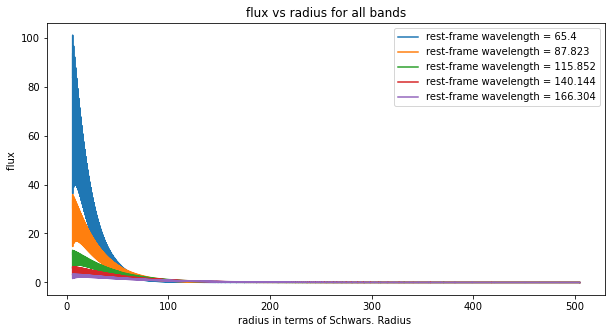

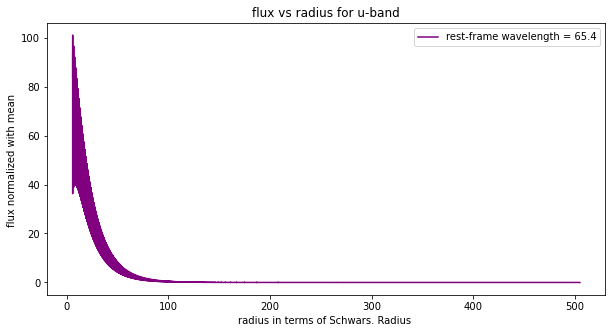

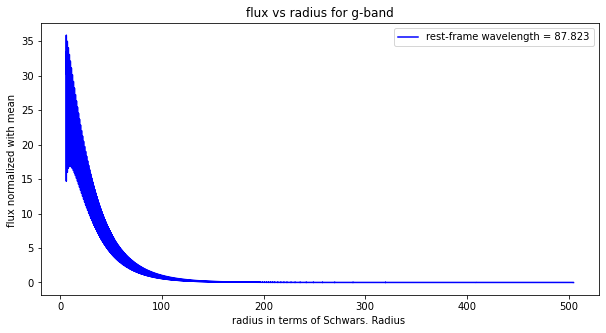

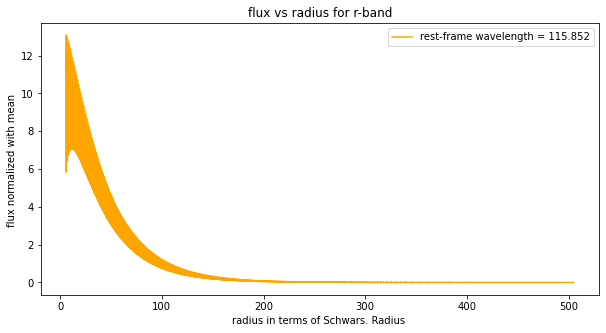

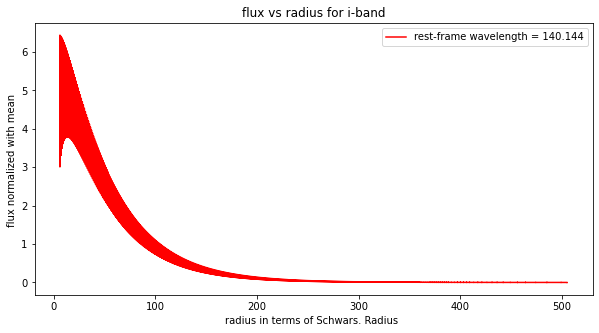

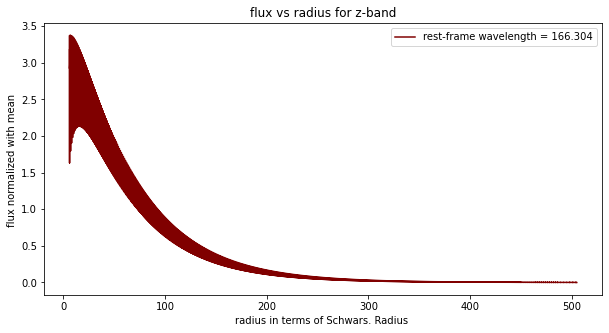


EXAMPLE LIGHT CURVES






PSD PLOTS






MORE PSDs

Slope: -1.4421329475896982 Intercept: 7.344737795331024


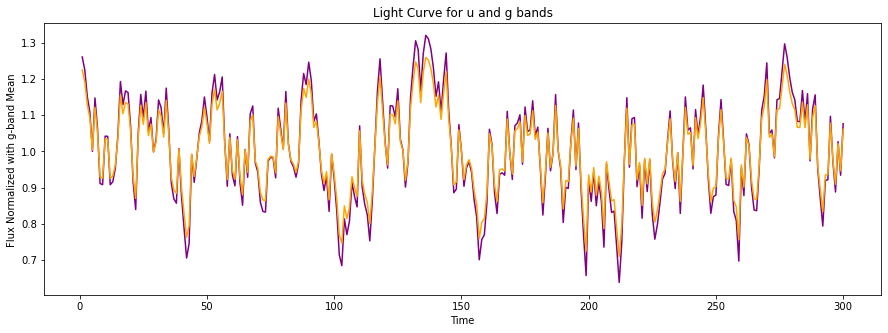

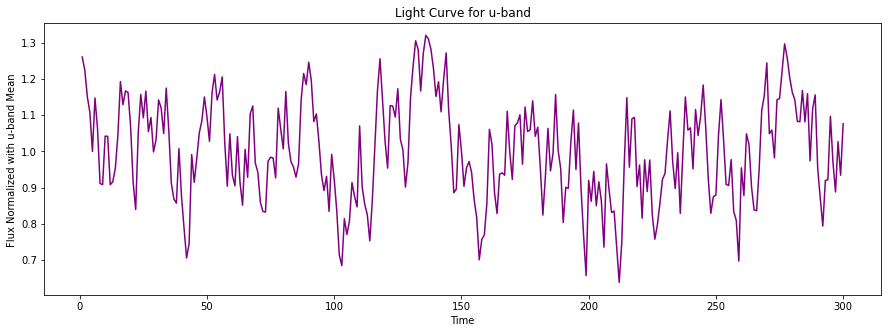

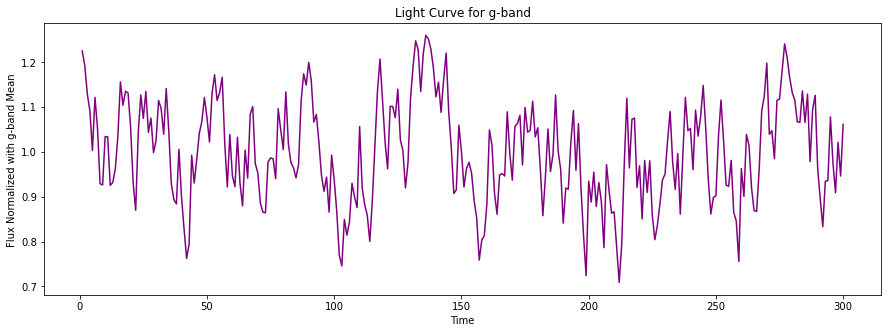

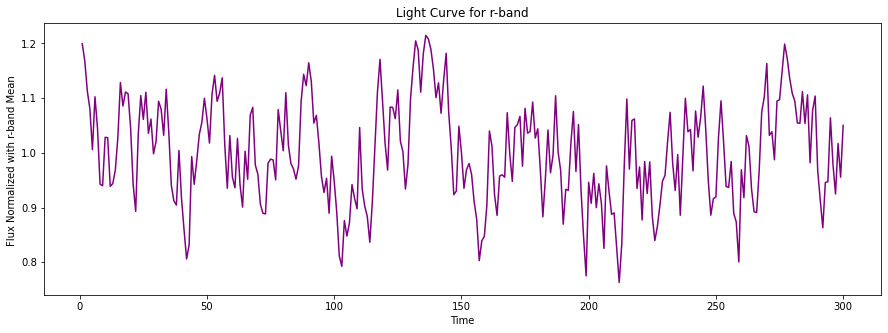

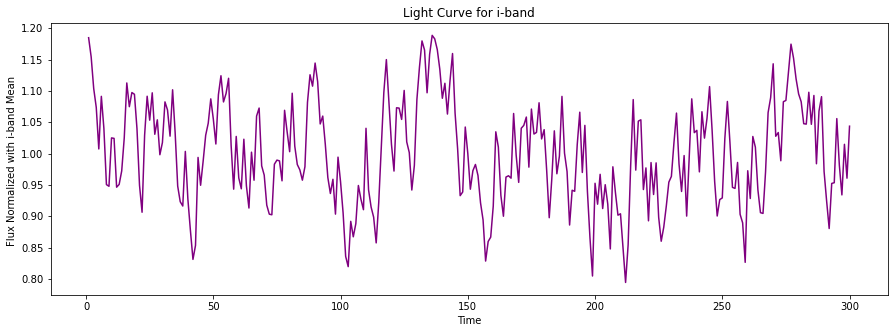

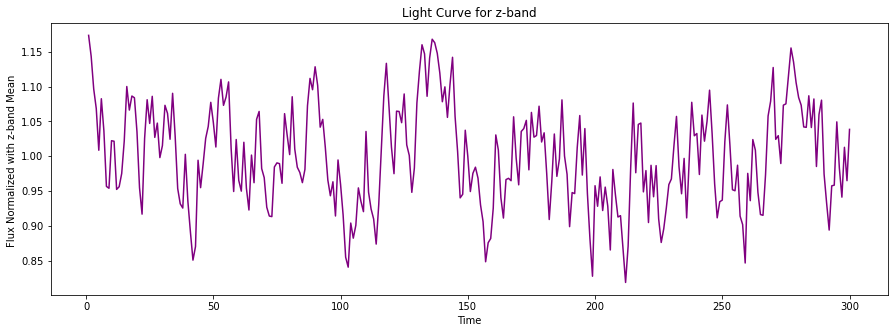

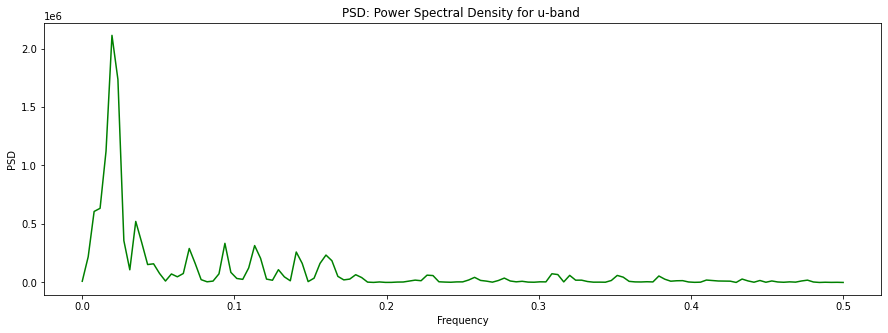

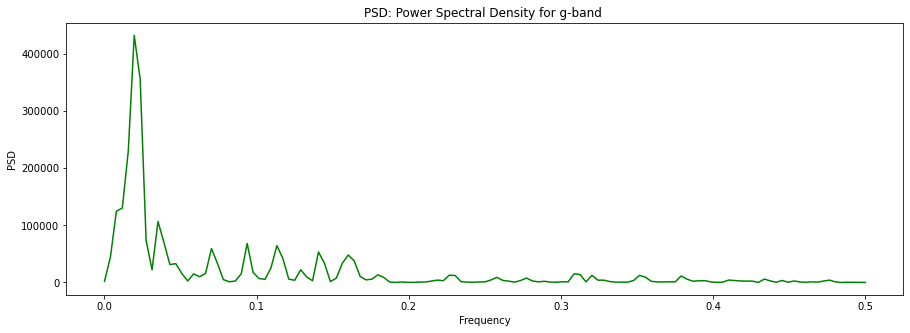

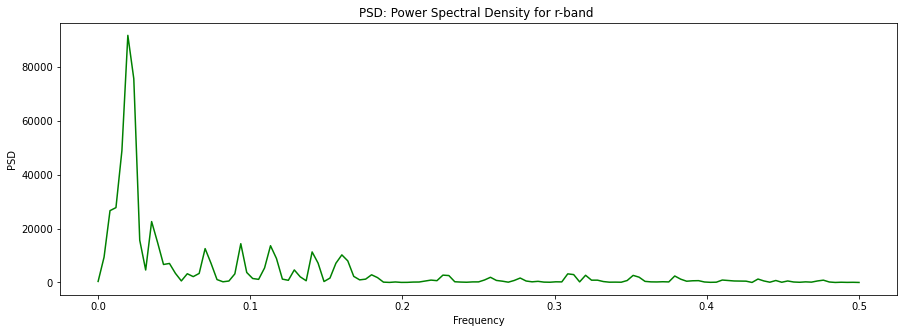

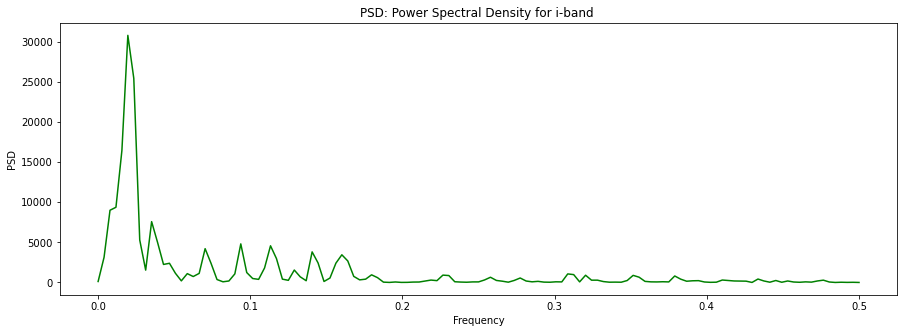

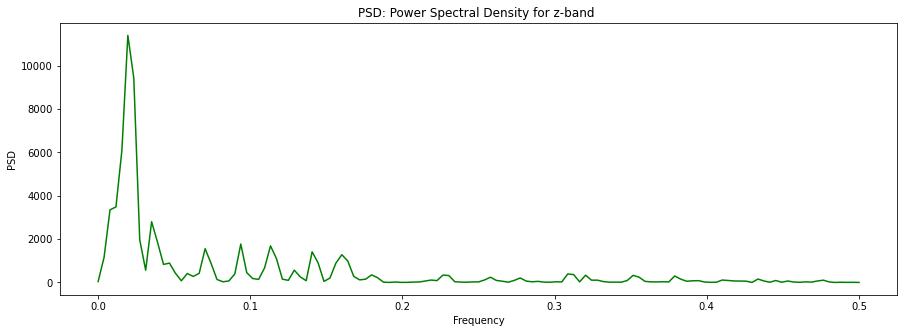

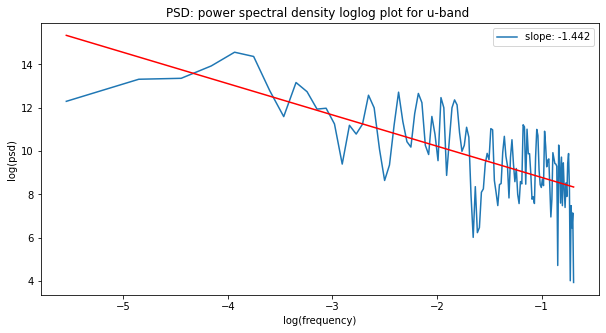


Slope: -1.4417751923119249 Intercept: 5.762258763779255


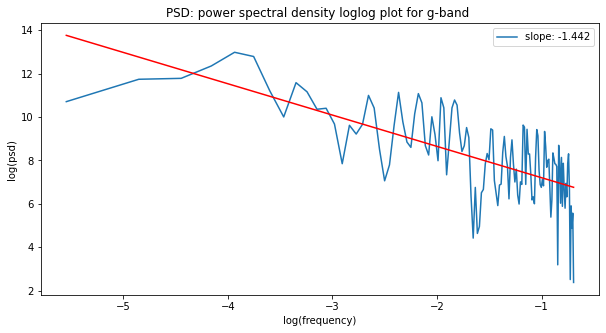


Slope: -1.4416243961893158 Intercept: 4.214296265426857


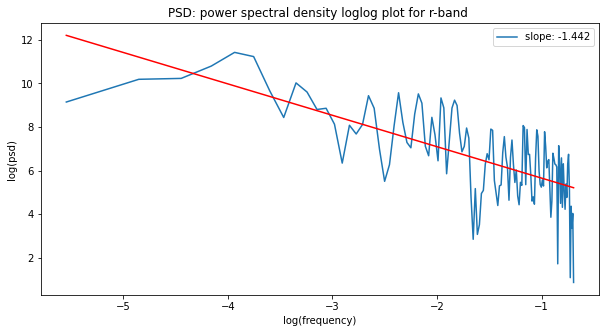


Slope: -1.441584821306946 Intercept: 3.12592409204087


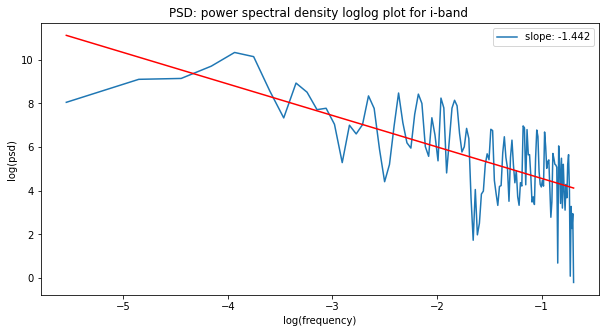


Slope: -1.4415645796323127 Intercept: 2.1339168987872665


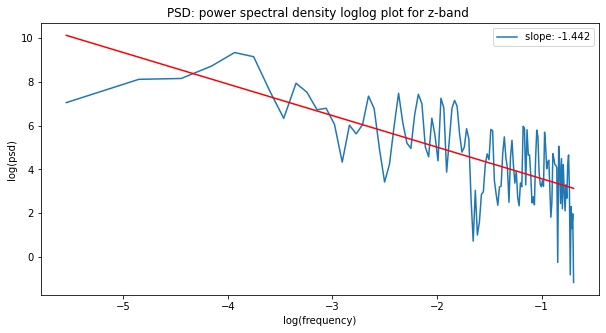


MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY


Ratios of Amplitudes of Variability

u band

u/g: 1.2358956716992502
u/r: 1.5015102718810178
u/i: 1.7136138608331548
u/z: 1.9283269539599812

g band

g/u: 0.8091297857084377
g/r: 1.2149166845261061
g/i: 1.3865360160029392
g/z: 1.560266775033444

r band

r/u: 0.6659961098682657
r/g: 0.823101709554728
r/i: 1.1412601651312209
r/z: 1.2842582498914699

i band

i/u: 0.5835620397665332
i/g: 0.7212217991154442
i/r: 0.8762243969892887
i/z: 1.1252984105896724

z band

z/u: 0.4725568685657443
z/g: 0.6409160382067132
z/r: 0.7786595881977071
z/i: 0.8886531702075235



In [103]:
#Shrey's code edited to include all 5 bands

tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=301
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum2=[]
lum3=[] 
lum4=[]
lum5=[]

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output2=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 
output4=np.zeros((q,N),dtype=float) 
output5=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N), dtype = int) 
rin=np.zeros(q+1, dtype = int) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N)

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
    rin[r+1]= rin[r]+1
    a=1
    t=1
    for x1 in np.arange (0,N): 
        c = 3.8
        b = 0.55
        phi = 0.7
        tstar = 25
        lambda1 = 350 / (red_g5 + 1)
        lambda2 = 470 / (red_g5 + 1)
        lambda3 = 620 / (red_g5 + 1)
        lambda4 = 750 / (red_g5 + 1)
        lambda5 = 890 / (red_g5 + 1)
        if(t<N):
            #Initial value of the AR(1) process... not sure why it is 4. 
            y1[0]=4
            #This is the m_n perturbation(AR(1)) term
            y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
            #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
        
            #This is the accretion rate term
            u1=(y1[t])**0.25
            uu.append(u1)
         
            #These are luminosities and come from the equation for Flux in section 3.3 
            L_u= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*tstar/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
            L_g= lambda xa2: (10**10) *(1*pi*xa2/(-1+e**(((xa2)**0.75)*tstar/(u1*lambda2)))) * (lambda2)**-5 # 10**9
            L_r= lambda xa3: (10**10) *(1*pi*xa3/(-1+e**(((xa3)**0.75)*tstar/(u1*lambda3)))) * (lambda3)**-5
            L_i= lambda xa4: (10**10) *(1*pi*xa4/(-1+e**(((xa4)**0.75)*tstar/(u1*lambda4)))) * (lambda4)**-5
            L_z= lambda xa5: (10**10) *(1*pi*xa5/(-1+e**(((xa5)**0.75)*tstar/(u1*lambda5)))) * (lambda5)**-5
        
            #We find FLUX by integrating it over some distance
            flux1,err1 = integrate.quad(L_u,rin[r], rin[r+1]) 
            flux2,err2 = integrate.quad(L_g,rin[r], rin[r+1])
            flux3,err3 = integrate.quad(L_r,rin[r], rin[r+1])
            flux4,err4 = integrate.quad(L_i,rin[r], rin[r+1])
            flux5,err5 = integrate.quad(L_z,rin[r], rin[r+1])
        
            #filling our previously empty arrays with the fluxes
            lum1.append(flux1)
            lum2.append(flux2)
            lum3.append(flux3)
            lum4.append(flux4)
            lum5.append(flux5)
            tm[r,x1]=t 
            output1[r,x1] = flux1 
            output2[r,x1] = flux2
            output3[r,x1] = flux3 
            output4[r,x1] = flux4
            output5[r,x1] = flux5
            yy.append(u1)  
            rr.append(rin[r])
            t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1 = sum(output1)
final_2 = sum(output2)
final_3 = sum(output3)
final_4 = sum(output4)
final_5 = sum(output5)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 = np.trim_zeros(final_1)
final2 = np.trim_zeros(final_2)
final3 = np.trim_zeros(final_3)
final4 = np.trim_zeros(final_4)
final5 = np.trim_zeros(final_5)
t1=(np.trim_zeros(tm[0,:]))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1 = 100*(np.std(final1))/np.mean(final1)
light2 = 100*(np.std(final2))/np.mean(final2)
light3 = 100*(np.std(final3))/np.mean(final3)
light4 = 100*(np.std(final4))/np.mean(final4)
light5 = 100*(np.std(final5))/np.mean(final5)

print()
print("BEGINNING OF PLOTTING AND CALCULATIONS for REDSHIFT GROUP 5")
print()
print("PLOTTING")
print()
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'rest-frame wavelength = '+ str(round(350 / (red_g5 + 1),3)))
plt.plot(rr, lum2, label = 'rest-frame wavelength = '+ str(round(470 / (red_g5 + 1),3)))
plt.plot(rr, lum3, label = 'rest-frame wavelength = '+ str(round(620 / (red_g5 + 1),3)))
plt.plot(rr, lum4, label = 'rest-frame wavelength = '+ str(round(750 / (red_g5 + 1),3)))
plt.plot(rr, lum5, label = 'rest-frame wavelength = '+ str(round(890 / (red_g5 + 1),3))) 
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux ') 
plt.title('flux vs radius for all bands')
plt.legend()

print()

#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'rest-frame wavelength = '+ str(round(350 / (red_g5 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'rest-frame wavelength = '+ str(round(470 / (red_g5 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'rest-frame wavelength = '+ str(round(620 / (red_g5 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'rest-frame wavelength = '+ str(round(750 / (red_g5 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

print()

#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'rest-frame wavelength = '+ str(round(890 / (red_g5 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

print()
print("EXAMPLE LIGHT CURVES")

plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')

print()

#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')
print()
plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

print()
print("PSD PLOTS")
print()

#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()
print()
plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()

print()
print("MORE PSDs")
print()

#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

print()

#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

print()
print("MEANS, STANDARD DEVIATIONS, AMPLITUDES OF VARIABILITY")
print()

#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u_5 = light1
AV_g_5 = light2
AV_r_5 = light3
AV_i_5 = light4
AV_z_5 = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug_5 = (AV_u_5 / AV_g_5)
R_AV_ur_5 = (AV_u_5 / AV_r_5)
R_AV_ui_5 = (AV_u_5 / AV_i_5)
R_AV_uz_5 = (AV_u_5 / AV_z_5)

print("u/g:", + R_AV_ug_5)
print("u/r:", + R_AV_ur_5)
print("u/i:", + R_AV_ui_5)
print("u/z:", + R_AV_uz_5)

print()
print("g band")
print()
R_AV_gu_5 = AV_g_5/AV_u_5
R_AV_gr_5 = AV_g_5/AV_r_5
R_AV_gi_5 = AV_g_5/AV_i_5
R_AV_gz_5 = AV_g_5/AV_z_5

print("g/u:", + R_AV_gu_5)
print("g/r:", + R_AV_gr_5)
print("g/i:", + R_AV_gi_5)
print("g/z:", + R_AV_gz_5)
print()

print("r band")
print()
R_AV_ru_5 = AV_r_5/AV_u_5
R_AV_rg_5 = AV_r_5/AV_g_5
R_AV_ri_5 = AV_r_5/AV_i_5
R_AV_rz_5 = AV_r_5/AV_z_5

print("r/u:", + R_AV_ru_5)
print("r/g:", + R_AV_rg_5)
print("r/i:", + R_AV_ri_5)
print("r/z:", + R_AV_rz_5)
print()

print("i band")
print()
R_AV_iu_5 = AV_i_5/AV_u_5
R_AV_ig_5 = AV_i_5/AV_g_5
R_AV_ir_5 = AV_i_5/AV_r_5
R_AV_iz_5 = AV_i_5/AV_z_5

print("i/u:", + R_AV_iu_5)
print("i/g:", + R_AV_ig_5)
print("i/r:", + R_AV_ir_5)
print("i/z:", + R_AV_iz_5)
print()

print("z band")
print()
R_AV_zu_5 = AV_z_5/AV_u_5
R_AV_zg_5 = AV_z_5/AV_g_5
R_AV_zr_5 = AV_z_5/AV_r_5
R_AV_zi_5 = AV_z_5/AV_i_5

print("z/u:", + R_AV_zu_5)
print("z/g:", + R_AV_zg_5)
print("z/r:", + R_AV_zr_5)
print("z/i:", + R_AV_zi_5)
print()

In [1]:
results_ug = []
results_ug.extend((R_AV_ug_1, R_AV_ug_2, R_AV_ug_3, R_AV_ug_4, R_AV_ug_5))

results_ur = []
results_ur.extend((R_AV_ur_1, R_AV_ur_2, R_AV_ur_3, R_AV_ur_4, R_AV_ur_5))

results_ui = []
results_ui.extend((R_AV_ui_1, R_AV_ui_2, R_AV_ui_3, R_AV_ui_4, R_AV_ui_5))

results_uz = []
results_uz.extend((R_AV_uz_1, R_AV_uz_2,R_AV_uz_3,R_AV_uz_4,R_AV_uz_5))

results_gu = []
results_gu.extend((R_AV_gu_1, R_AV_gu_2, R_AV_gu_3, R_AV_gu_4, R_AV_gu_5))

results_gr = []
results_gr.extend((R_AV_gr_1, R_AV_gr_2, R_AV_gr_3, R_AV_gr_4, R_AV_gr_5))

results_gi = []
results_gi.extend((R_AV_gi_1, R_AV_gi_2, R_AV_gi_3, R_AV_gi_4, R_AV_gi_5))

results_gz = []
results_gz.extend((R_AV_gz_1, R_AV_gz_2, R_AV_gz_3, R_AV_gz_4, R_AV_gz_5))

results_ru = []
results_ru.extend((R_AV_ru_1, R_AV_ru_2, R_AV_ru_3, R_AV_ru_4, R_AV_ru_5))

results_rg = []
results_rg.extend((R_AV_rg_1, R_AV_rg_2, R_AV_rg_3, R_AV_rg_4, R_AV_rg_5))

results_ri = []
results_ri.extend((R_AV_ri_1, R_AV_ri_2, R_AV_ri_3, R_AV_ri_4, R_AV_ri_5))

results_rz = []
results_rz.extend((R_AV_rz_1, R_AV_rz_2, R_AV_rz_3, R_AV_rz_4, R_AV_rz_5))

results_iu = []
results_iu.extend((R_AV_iu_1, R_AV_iu_2, R_AV_iu_3, R_AV_iu_4, R_AV_iu_5))

results_ig = []
results_ig.extend((R_AV_ig_1, R_AV_ig_2, R_AV_ig_3, R_AV_ig_4, R_AV_ig_5))

results_ir = []
results_ir.extend((R_AV_ir_1, R_AV_ir_2, R_AV_ir_3, R_AV_ir_4, R_AV_ir_5))

results_iz = []
results_iz.extend((R_AV_iz_1, R_AV_iz_2, R_AV_iz_3, R_AV_iz_4, R_AV_iz_5))

results_zu = []
results_zu.extend((R_AV_zu_1, R_AV_zu_2, R_AV_zu_3, R_AV_zu_4, R_AV_zu_5))

results_zg = []
results_zg.extend((R_AV_zg_1, R_AV_zg_2, R_AV_zg_3, R_AV_zg_4, R_AV_zg_5))

results_zr = []
results_zr.extend((R_AV_zr_1, R_AV_zr_2, R_AV_zr_3, R_AV_zr_4, R_AV_zr_5))

results_zi = []
results_zi.extend((R_AV_zi_1, R_AV_zi_2, R_AV_zi_3, R_AV_zi_4, R_AV_zi_5))

NameError: name 'R_AV_ug_1' is not defined

In [153]:
all_results = [['u/g', results_ug], ['u/r', results_ur], ['u/i', results_ui], ['u/z', results_uz], ['g/u', results_gu], ['g/r', results_gr], ['g/i', results_gi], ['g/z', results_gz], ['r/u', results_ru], ['r/g', results_rg], ['r/i', results_ri], ['r/z', results_rz], ['i/u', results_iu], ['i/g', results_ig], ['i/r', results_ir], ['i/z', results_iz], ['z/u', results_zu], ['z/r', results_zr], ['z/g', results_zg], ['z/i', results_zi]]
#for i in zip(results_ug, results_ur, results_ui, results_uz, results_gu, results_gr, results_gi, results_gz, results_ru, results_rg, results_ri, results_rz, results_iu, results_ig, results_ir, results_iz, results_zu, results_zg, results_zr, results_zi):
#    all_results.append(i)

df_results = pd.DataFrame(all_results)

In [154]:
print(df_results)

      0                                                  1
0   u/g  [1.2211762479441406, 1.2246875669033308, 1.221...
1   u/r  [1.4745484264202704, 1.4820850980093094, 1.472...
2   u/i  [1.675487497221605, 1.6906375228220414, 1.6750...
3   u/z  [1.87267185481061, 1.9027527332786638, 1.88163...
4   g/u  [0.8188826155794526, 0.8165347857074585, 0.818...
5   g/r  [1.207482072225597, 1.2101740379032493, 1.2056...
6   g/i  [1.3720275840954987, 1.3804643474064842, 1.371...
7   g/z  [1.5334984265893372, 1.5536637953219747, 1.540...
8   r/u  [0.6781737256521839, 0.6747250892294706, 0.679...
9   r/g                                                 []
10  r/i  [1.1362715982744291, 1.140715553440793, 1.1374...
11  r/z  [1.2699968487008972, 1.2838350077430654, 1.277...
12  i/u  [0.5968412188442234, 0.5914928460423513, 0.597...
13  i/g  [0.7288483202465964, 0.7243939344603337, 0.729...
14  i/r  [0.8800712800695057, 0.8766427326984837, 0.879...
15  i/z  [1.117687752320437, 1.12546462952186, 1.123355.

In [155]:
#exporting to excel
df_results.to_excel("ResearchDatas.xlsx", sheet_name='Sheet_name1')

https://www.aanda.org/articles/aa/full/2007/05/aa6283-06/aa6283-06.right.html

This article goes over quasar variability timescales and size of accretion disk.

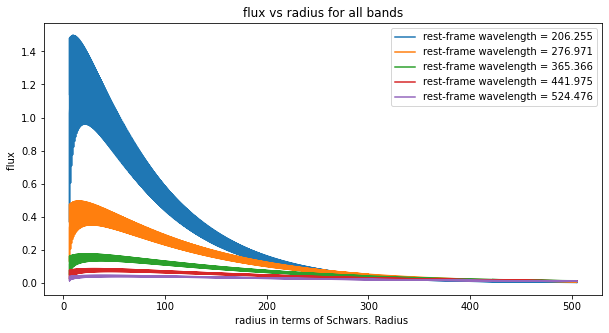

In [48]:
#Creating flux versus radius plots with labels
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, label = 'rest-frame wavelength = '+ str(round(350 / (red_g1 + 1),3)))
plt.plot(rr, lum2, label = 'rest-frame wavelength = '+ str(round(470 / (red_g1 + 1),3)))
plt.plot(rr, lum3, label = 'rest-frame wavelength = '+ str(round(620 / (red_g1 + 1),3)))
plt.plot(rr, lum4, label = 'rest-frame wavelength = '+ str(round(750 / (red_g1 + 1),3)))
plt.plot(rr, lum5, label = 'rest-frame wavelength = '+ str(round(890 / (red_g1 + 1),3))) 
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux ') 
plt.title('flux vs radius for all bands')
plt.legend()

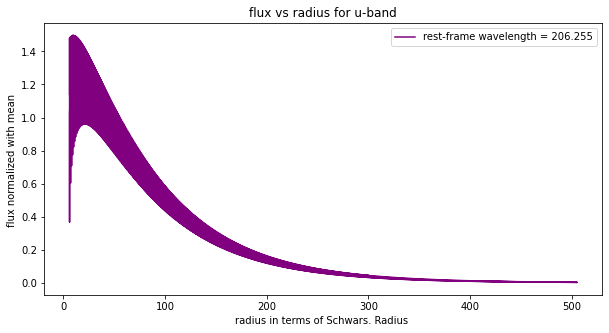

In [51]:
#More flux versus radius plotting
plt.figure(figsize = (10,5))
plt.plot(rr, lum1, color = "purple", label = 'rest-frame wavelength = '+ str(round(350 / (red_g1 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for u-band')
plt.legend()
plt.show()

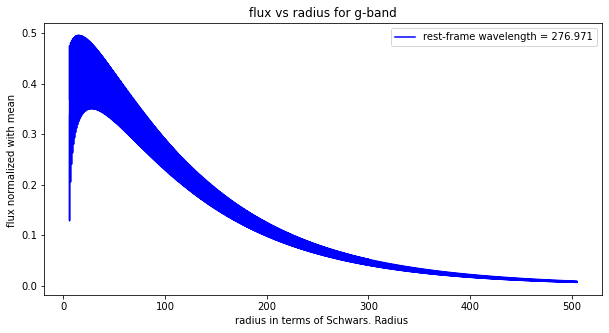

In [53]:
#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum2, color = "blue", label = 'rest-frame wavelength = '+ str(round(470 / (red_g1 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for g-band')
plt.legend()
plt.show()

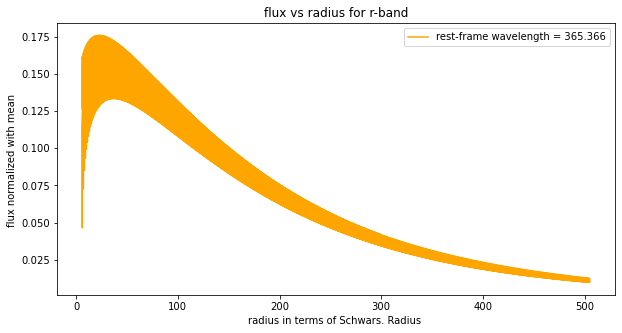

In [54]:
#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum3, color = "orange", label = 'rest-frame wavelength = '+ str(round(620 / (red_g1 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for r-band')
plt.legend()
plt.show()

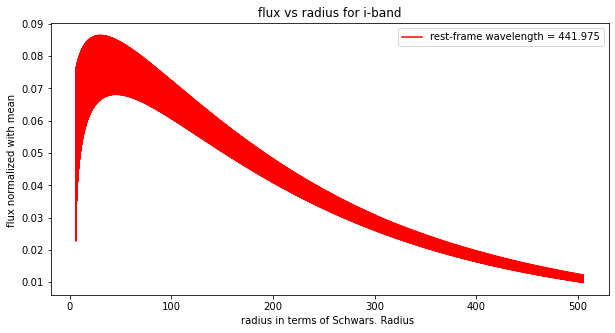

In [55]:
#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum4, color = "red", label = 'rest-frame wavelength = '+ str(round(750 / (red_g1 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for i-band')
plt.legend()
plt.show()

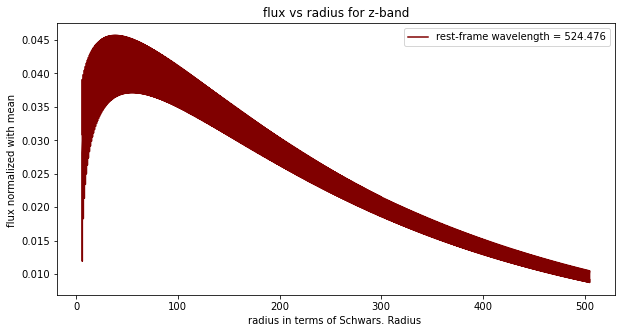

In [56]:
#More plotting flux versus radius
plt.figure(figsize = (10,5))
plt.plot(rr ,lum5, color = "maroon", label = 'rest-frame wavelength = '+ str(round(890 / (red_g1 + 1),3)))
plt.xlabel('radius in terms of Schwars. Radius ') 
plt.ylabel('flux normalized with mean ') 
plt.title('flux vs radius for z-band')
plt.legend()
plt.show()

Text(0, 0.5, 'Flux Normalized with g-band Mean ')

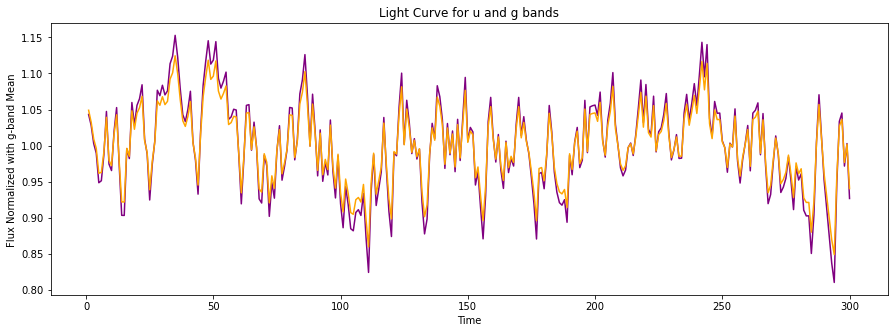

In [57]:
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u and g bands')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125
plt.plot(t1,final2/np.mean(final2), color = "orange") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')


Text(0.5, 1.0, 'Light Curve for z-band')

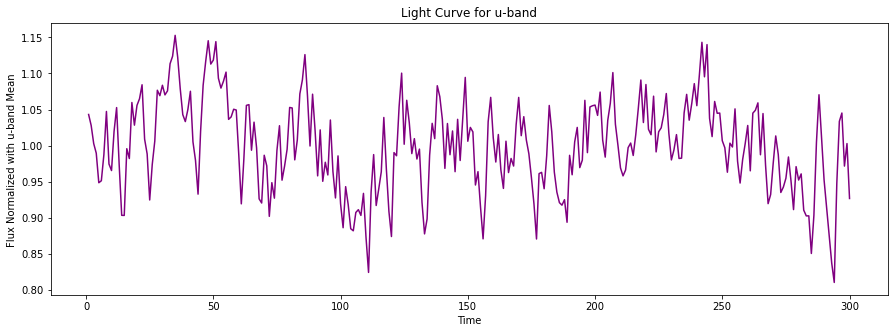

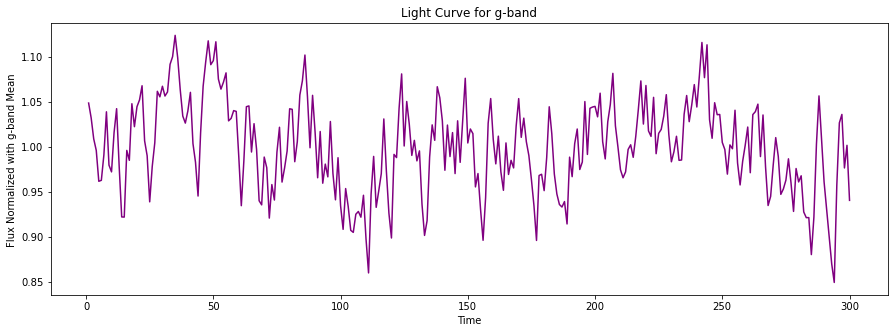

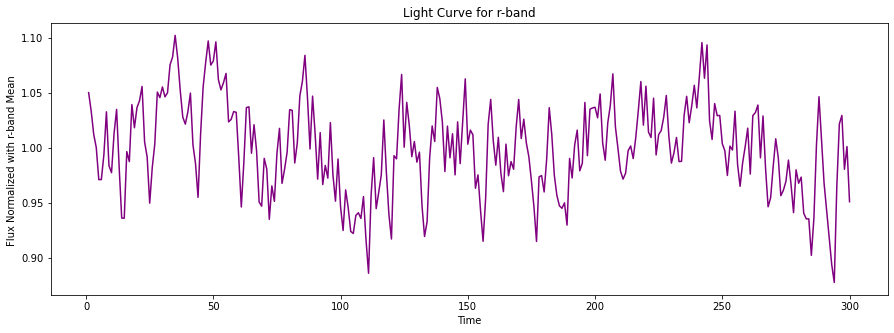

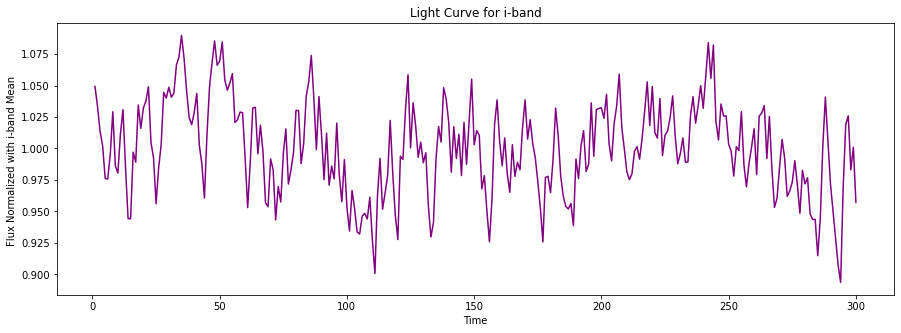

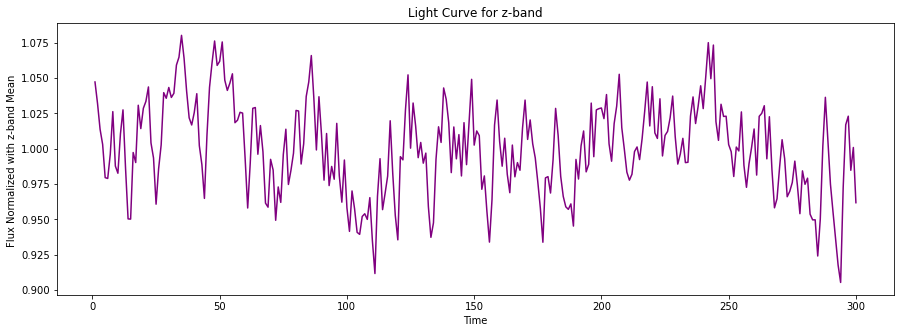

In [58]:
#Light Curve plot using normalized flux
plt.figure(figsize = (15,5))
plt.plot(t1,final1/np.mean(final1), color = "purple") 
#plt.xlim(0,25)
plt.xlabel('Time')
plt.ylabel('Flux Normalized with u-band Mean ')
plt.title('Light Curve for u-band')# for parameter values of c=3.8,b=0.55 ')  #T* was supposed to be 125

plt.figure(figsize = (15,5))
plt.plot(t1,final2/np.mean(final2), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with g-band Mean ')
plt.title('Light Curve for g-band')# for parameter values of c=3.8,b=0.55 ')

plt.figure(figsize = (15,5))
plt.plot(t1,final3/np.mean(final3), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with r-band Mean ')
plt.title('Light Curve for r-band')# for parameter values of c=3.8,b=0.55 ')

plt.figure(figsize = (15,5))
plt.plot(t1,final4/np.mean(final4), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with i-band Mean ')
plt.title('Light Curve for i-band') #for parameter values of c=3.8,b=0.55 ')

plt.figure(figsize = (15,5))
plt.plot(t1,final5/np.mean(final5), color = "purple") 
plt.xlabel('Time')
plt.ylabel('Flux Normalized with z-band Mean ')
plt.title('Light Curve for z-band')   #for parameter values of c=3.8,b=0.55
#plt.plot(t1,final5/np.mean(final5), color = "maroon")
#plt.legend()
#print("Amp(u)/Amp(z):" , light1/light5)

A PSD is typically used to characterize broadband random signals. A PSD is used to see at which frequencies variations are strong and at which frequencies variations are weak. 

Text(0.5, 1.0, 'PSD: Power Spectral Density for z-band ')

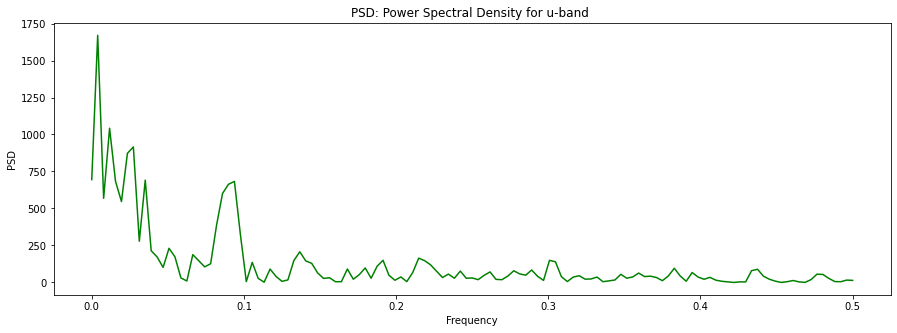

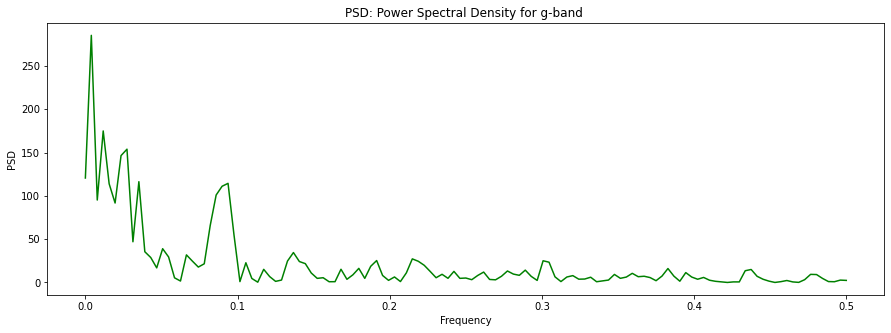

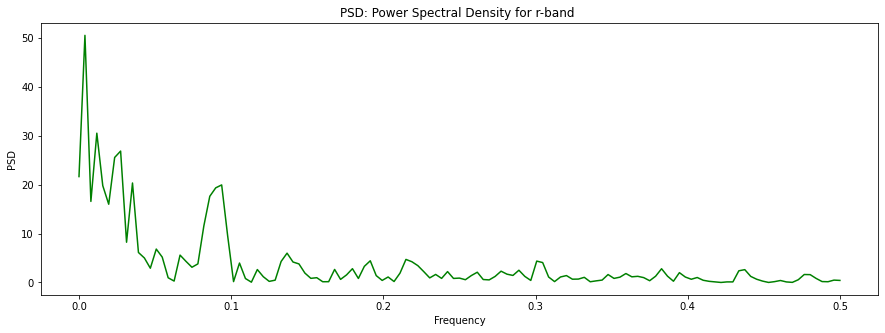

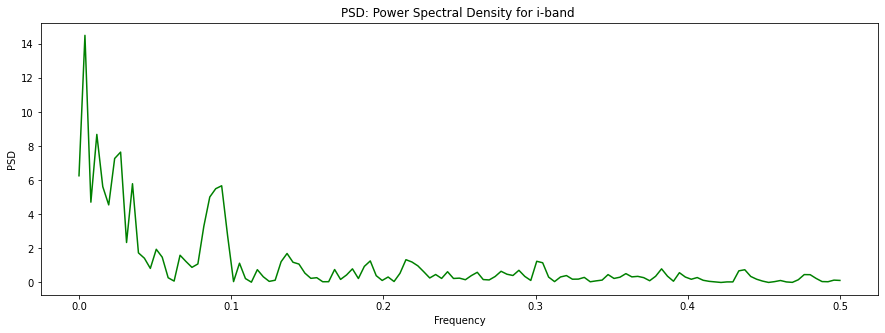

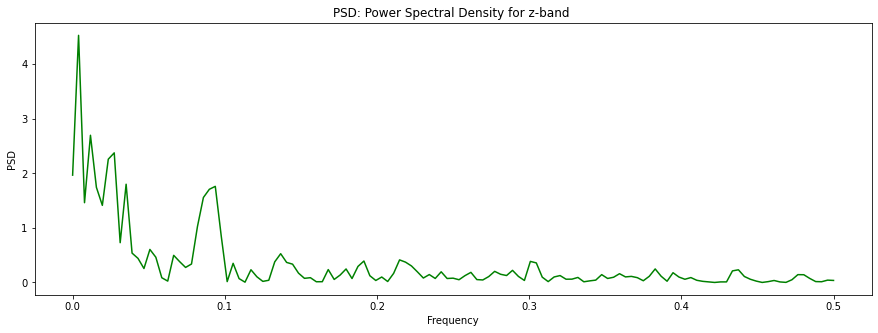

In [59]:
#Using a function called signal.welch in order to calculate frequency and psd
fs = 1
freqs1, psd1 = signal.welch(final1, fs)
freqs2, psd2 = signal.welch(final2, fs)
freqs3, psd3 = signal.welch(final3, fs)
freqs4, psd4 = signal.welch(final4, fs)
freqs5, psd5 = signal.welch(final5, fs)

plt.figure(figsize = (15,5))
plt.plot(freqs1, psd1, color = 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for u-band ')
#plt.legend()

plt.figure(figsize = (15,5))
plt.plot(freqs2, psd2, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for g-band ')
#plt.legend()

plt.figure(figsize = (15,5))
plt.plot(freqs3, psd3, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for r-band ')
#plt.legend()

plt.figure(figsize = (15,5))
plt.plot(freqs4, psd4, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for i-band ')
#plt.legend()

plt.figure(figsize = (15,5))
plt.plot(freqs5, psd5, color= 'green')
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.title('PSD: Power Spectral Density for z-band ')
#plt.legend()


Slope: -1.0919754705396922 Intercept: 1.9239569353914692


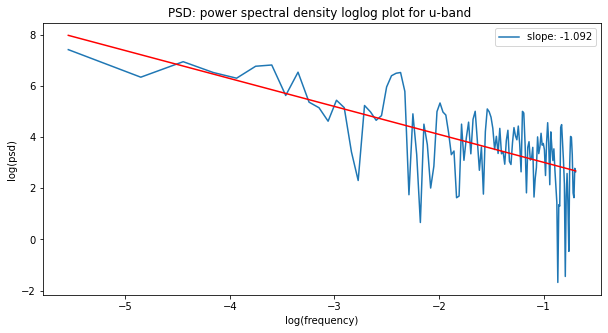

In [60]:
#Doing similar thing as above but now for a loglog plot
logfreqs1=np.log(freqs1[1 :])
logpsd1=np.log(psd1[1 : ])
plt.figure(figsize=(10, 5))
slope1,intercept1=np.polyfit(logfreqs1,logpsd1, 1)
plt.plot(logfreqs1, logpsd1, label = "slope: " + str(round(slope1,3)))
plt.title('PSD: power spectral density loglog plot for u-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope1, "Intercept:", intercept1)
plt.plot(logfreqs1, slope1*logfreqs1+intercept1,'r' )
plt.legend()
plt.show()

Slope: -1.0935449544098035 Intercept: 0.13552885208068768


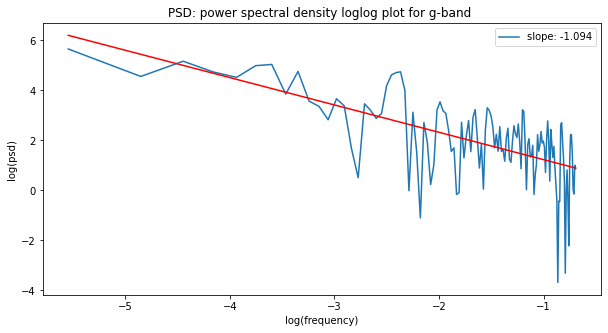

In [61]:
#Doing similar thing as above but now for a loglog plot
logfreqs2=np.log(freqs2[1 :])
logpsd2=np.log(psd2[1 : ])
plt.figure(figsize=(10, 5))
slope2,intercept2=np.polyfit(logfreqs2,logpsd2, 1)
plt.plot(logfreqs2, logpsd2, label = "slope: " + str(round(slope2,3)))
plt.title('PSD: power spectral density loglog plot for g-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope2, "Intercept:", intercept2)
plt.plot(logfreqs2, slope2*logfreqs2+intercept2,'r' )
plt.legend()
plt.show()

Slope: -1.0948002299534345 Intercept: -1.6133333634720317


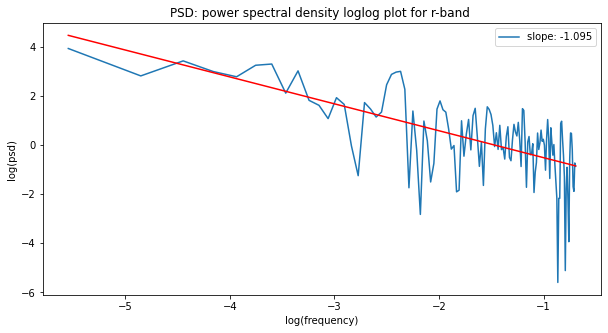

In [62]:
#Doing similar thing as above but now for a loglog plot
logfreqs3=np.log(freqs3[1 :])
logpsd3=np.log(psd3[1 : ])
plt.figure(figsize=(10, 5))
slope3,intercept3=np.polyfit(logfreqs3,logpsd3, 1)
plt.plot(logfreqs3, logpsd3, label = "slope: " + str(round(slope3,3)))
plt.title('PSD: power spectral density loglog plot for r-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope3, "Intercept:", intercept3)
plt.plot(logfreqs3, slope3*logfreqs3+intercept3,'r' )
plt.legend()
plt.show()

Slope: -1.0954749271471549 Intercept: -2.8695840020319743


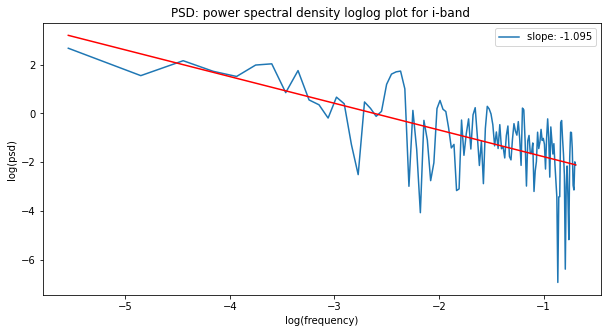

In [63]:
#Doing similar thing as above but now for a loglog plot
logfreqs4=np.log(freqs4[1 :])
logpsd4=np.log(psd4[1 : ])
plt.figure(figsize=(10, 5))
slope4,intercept4=np.polyfit(logfreqs4,logpsd4, 1)
plt.plot(logfreqs4, logpsd4, label = "slope: " + str(round(slope4,3)))
plt.title('PSD: power spectral density loglog plot for i-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope4, "Intercept:", intercept4)
plt.plot(logfreqs4, slope4*logfreqs4+intercept4,'r' )
plt.legend()
plt.show()

Slope: -1.0959461765286833 Intercept: -4.041335446259052


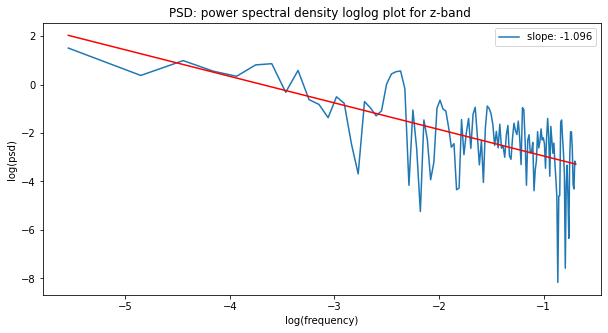

In [64]:
#Doing similar thing as above but now for a loglog plot
logfreqs5=np.log(freqs5[1 :])
logpsd5=np.log(psd5[1 : ])
plt.figure(figsize=(10, 5))
slope5,intercept5=np.polyfit(logfreqs5,logpsd5, 1)
plt.plot(logfreqs5, logpsd5, label = "slope: " + str(round(slope5,3)))
plt.title('PSD: power spectral density loglog plot for z-band ') 
plt.xlabel('log(frequency)')
plt.ylabel('log(psd)')
print("Slope:", slope5, "Intercept:", intercept5)
plt.plot(logfreqs5, slope5*logfreqs5+intercept5,'r' )
plt.legend()
plt.show()

In [65]:
#print('Amp in u-band ', light1)
#print('Amp in g-band ', light2)
#print('Amp in r-band ', light3)
#print('Amp in i-band ', light4)
#print('Amp in z-band ', light5)

AV_u = light1
AV_g = light2
AV_r = light3
AV_i = light4
AV_z = light5



print()
print("Ratios of Amplitudes of Variability")
print()

print("u band")
print()
R_AV_ug = (AV_u / AV_g)
R_AV_ur = (AV_u / AV_r)
R_AV_ui = (AV_u / AV_i)
R_AV_uz = (AV_u / AV_z)

print("u/g:", + R_AV_ug)
print("u/r:", + R_AV_ur)
print("u/i:", + R_AV_ui)
print("u/z:", + R_AV_uz)

print()
print("g band")
print()
R_AV_gu = AV_g/AV_u
R_AV_gr = AV_g/AV_r
R_AV_gi = AV_g/AV_i
R_AV_gz = AV_g/AV_z

print("g/u:", + R_AV_gu)
print("g/r:", + R_AV_gr)
print("g/i:", + R_AV_gi)
print("g/z:", + R_AV_gz)
print()

print("r band")
print()
R_AV_ru = AV_r/AV_u
R_AV_rg = AV_r/AV_g
R_AV_ri = AV_r/AV_i
R_AV_rz = AV_r/AV_z

print("r/u:", + R_AV_ru)
print("r/g:", + R_AV_rg)
print("r/i:", + R_AV_ri)
print("r/z:", + R_AV_rz)
print()

print("i band")
print()
R_AV_iu = AV_i/AV_u
R_AV_ig = AV_i/AV_g
R_AV_ir = AV_i/AV_r
R_AV_iz = AV_i/AV_z

print("i/u:", + R_AV_iu)
print("i/g:", + R_AV_ig)
print("i/r:", + R_AV_ir)
print("i/z:", + R_AV_iz)
print()

print("z band")
print()
R_AV_zu = AV_z/AV_u
R_AV_zg = AV_z/AV_g
R_AV_zr = AV_z/AV_r
R_AV_zi = AV_z/AV_i

print("z/u:", + R_AV_zu)
print("z/g:", + R_AV_zg)
print("z/r:", + R_AV_zr)
print("z/i:", + R_AV_zi)
print()


Ratios of Amplitudes of Variability

u band

u/g: 1.2350471980740663
u/r: 1.5042549503861276
u/i: 1.7172681080050523
u/z: 1.9258673194989113

g band

g/u: 0.8096856553817546
g/r: 1.2179736553646405
g/i: 1.3904473534962565
g/z: 1.5593471427667789

r band

r/u: 0.6647809267593301
r/g: 0.8210358209271916
r/i: 1.14160708433384
r/z: 1.280279861471993

i band

i/u: 0.5823202535110831
i/g: 0.7191929974806431
i/r: 0.8759581240541515
i/z: 1.121471545719316

z band

z/u: 0.5192465700389934
z/g: 0.6412940214362283
z/r: 0.781079223452173
z/i: 0.8916855749189752



In [130]:
all_analysis = list(zip(R_AV_ug, R_AV_ur, R_AV_ui, R_AV_ug, R_AV_gu, R_AV_gr, R_AV_gi, R_AV_gz, R_AV_ru, R_AV_rg, R_AV_ri,R_AV_rz,R_AV_iu, R_AV_ig, R_AV_ir, R_AV_iz, R_AV_zu, R_AV_zg, R_AV_zr, R_AV_zi))
df_analysis = pd.DataFrame(all_analysis)

TypeError: 'numpy.float64' object is not iterable

In [ ]:
#Shrey's original code with minimal editing
#empty arrays that will be filled later
tt=[]
yy=[]
rr=[]
#number of zones
q=500
#number of time steps that the AR(1) process uses
N=300
#more empty arrays that will be filled later
uu=[]
lum1=[]
lum3=[] 

#these are zero arrays that will be turned into fluxes later
output1=np.zeros((q,N),dtype=float) 
output3=np.zeros((q,N),dtype=float) 

#all of these are arrays filled with zeros that will be trimmed or turned into new values later
tm=np.zeros((q,N),dtype=int) 
rin=np.zeros(q+1) 
y1=np.zeros(N)
#random number between -1 and 1 and goes into AR(1) process
z=np.random.uniform(-1, 1,N) 

rin[0]=6
for r in np.arange(0,q):# partitioning the disc into equal thickness zone 
   rin[r+1]= rin[r]+1
   a=1
   t=1
   for x1 in np.arange (0,N): 
        c = 3.8
        b = 0.55
        phi = 0.7
        lambda1 = 470
        lambda2 = 620
        if(t<N):
         #Initial value of the AR(1) process... not sure why it is 4. 
         y1[0]= 4
         #This is the m_n perturbation(AR(1)) term
         y1[t] = 1+(phi*y1[t-1]+(c/(rin[r])**b)*z[t]) #This is the perturbation introduced into the disc
         #This has the form m_n = (phi* m_n-1) + c*(r^-b)*z_n
         #In this case- c = 3, b = 0.5
        
         #This is the accretion rate term
         u1=(y1[t])**0.25
         uu.append(u1)
         
         #These are luminosities and come from the equation for Flux in section 3.3 
         L1= lambda xa1: (10**10) *(1*pi*xa1/(-1+e**(((xa1)**0.75)*25/(u1*lambda1)))) * (lambda1)**-5 #10**8 at below eddington
         L3= lambda xa3: (10**10)*(1*pi*xa3/(-1+e**(((xa3)**0.75)*25/(u1*lambda2)))) * (lambda2)**-5 # 10**9
         
         #We find FLUX by integrating it over some distance
         flux1,err1 = integrate.quad(L1,rin[r], rin[r+1]) 
         flux3,err3= integrate.quad(L3,rin[r], rin[r+1]) 
         
         #filling our previously empty arrays with the fluxes
         lum1.append(flux1)
         lum3.append(flux3)
         tm[r,x1]=t 
         output1[r,x1]= flux1 
         output3[r,x1]= flux3 
         yy.append(u1) 
         rr.append(rin[r]) 
         t=t+a;
            
#We have flux here... units of kg⋅m²⋅s⁻³ / m^−2
final_1=sum(output1)
final_3=sum(output3)

#We have these arrays that have been partially filled but still have zeros that we don't want... getting rid of them here
final1 =(np.trim_zeros(final_1))
t1=(np.trim_zeros(tm[0,:]))
final3 =(np.trim_zeros(final_3))

#finding amplitudes of the light curves by dividing the std. dev by the mean
light1= 100*(np.std(final1))/np.mean(final1)
light2= 100*(np.std(final3))/np.mean(final3)
print('amp in g band ', light1,':amp in r band' ,light2,':ratio -g/r' ,light1/light2 )